# Library and Data Imports and Standardization

In [1]:
# Make the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Import ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Import train test split
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report, accuracy_score, f1_score, r2_score, root_mean_squared_error

# Import log2
import math

# Import pprint
from pprint import pprint

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import the datasets
convabuse = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/convabuse_final.csv')
dynamically_generated_hate_speech = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/dynamically_generated_hate_speech_dataset_final.csv')
online_abusive_attacks = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/online_abusive_attacks_final.csv')
us_elections_2020_hate_speech = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/us_elections_2020_hate_speech_final.csv')
mlma_hate_speech = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/MLMA_hate_speech_final.csv')

In [3]:
convabuse.head()

,race_or_ethnicity,gender,religion,lgbtq,nationality,age,disability,class,none,abuse_level
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
convabuse_X = convabuse.drop("abuse_level", axis=1)
convabuse_y = convabuse["abuse_level"]

In [ ]:
dynamically_generated_hate_speech.head()

,label,type,race_or_ethnicity,gender,religion,lgbtq,nationality,age,disability,class,none,original
0,1.0,-1,0,0,0,1,0,0,0,0,0,0
1,1.0,-1,0,0,0,0,0,0,0,0,0,1
2,1.0,-1,0,0,0,0,0,0,0,0,0,0
3,1.0,0,0,0,0,0,0,0,0,0,1,1
4,1.0,-1,0,0,0,0,0,0,0,0,0,1


In [5]:
dghs_X = dynamically_generated_hate_speech.drop("label", axis=1)
dghs_y = dynamically_generated_hate_speech["label"]

In [6]:
online_abusive_attacks.head()

,verified,high Identity_Attack,high Insult,high Profanity,high Threat,high other attr,Toxicity
0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2.0,0.0,10.0,0.0,0.0,1.0
2,0,17.0,1.0,25.0,1.0,0.0,1.0
3,0,9.0,2.0,33.0,2.0,0.0,3.0
4,0,0.0,0.0,7.0,0.0,0.0,0.0


In [7]:
oaa_X = online_abusive_attacks.drop("Toxicity", axis=1)
oaa_y = online_abusive_attacks["Toxicity"]

In [8]:
us_elections_2020_hate_speech.head()

,Trump,Biden,HOF
0,1.0,4.0,1
1,4.0,0.0,1
2,0.0,1.0,1
3,1.0,4.0,1
4,4.0,1.0,1


In [9]:
us2020hs_X = us_elections_2020_hate_speech.drop("HOF", axis=1)
us2020hs_y = us_elections_2020_hate_speech["HOF"]

In [10]:
mlma_hate_speech.head()

,index,directness,shock_annotator_sentiment,anger_annotator_sentiment,confusion_annotator_sentiment,sadness_annotator_sentiment,indifference_annotator_sentiment,disgust_annotator_sentiment,fear_annotator_sentiment,race_or_ethnicity,gender,religion,lgbtq,nationality,age,disability,class,none,abuse_level
0,7463,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,883,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0
2,5524,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,5323,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,12290,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
mlma_hate_speech_X = mlma_hate_speech.drop("abuse_level", axis=1)
mlma_hate_speech_y = mlma_hate_speech["abuse_level"]

# Linear Modeling

In [12]:
# Get only the numeric features for each dataset
convabuse_X_numeric = convabuse_X.select_dtypes(include=np.number)
dghs_X_numeric = dghs_X.select_dtypes(include=np.number)
oaa_X_numeric = oaa_X.select_dtypes(include=np.number)
us2020hs_X_numeric = us2020hs_X.select_dtypes(include=np.number)
mlma_hate_speech_X_numeric = mlma_hate_speech_X.select_dtypes(include=np.number)

In [13]:
# Use standard scaler on the Convabuse data
convabuse_scaler = StandardScaler()
convabuse_X_scaled = convabuse_scaler.fit_transform(convabuse_X_numeric)
convabuse_X_scaled = pd.DataFrame(convabuse_X_scaled, columns=convabuse_X_numeric.columns)

In [14]:
# Use standard scaler on the Dynamically Generated Hate Speech X data
dghs_scaler = StandardScaler()
dghs_X_scaled = dghs_scaler.fit_transform(dghs_X_numeric)
dghs_X_scaled = pd.DataFrame(dghs_X_scaled, columns=dghs_X_numeric.columns)

In [15]:
# Use standard scaler on the Online Abusive Attacks X data
oaa_scaler = StandardScaler()
oaa_X_scaled = oaa_scaler.fit_transform(oaa_X_numeric)
oaa_X_scaled = pd.DataFrame(oaa_X_scaled, columns=oaa_X_numeric.columns)

In [16]:
# Use standard scaler on the US elections 2020 hate speech X data
us2020hs_scaler = StandardScaler()
us2020hs_X_scaled = us2020hs_scaler.fit_transform(us2020hs_X_numeric)
us2020hs_X_scaled = pd.DataFrame(us2020hs_X_scaled, columns=us2020hs_X_numeric.columns)

In [17]:
# Use standard scaler on the MLMA hate speech X data
mlma_hate_speech_scaler = StandardScaler()
mlma_hate_speech_X_scaled = mlma_hate_speech_scaler.fit_transform(mlma_hate_speech_X_numeric)
mlma_hate_speech_X_scaled = pd.DataFrame(mlma_hate_speech_X_scaled, columns=mlma_hate_speech_X_numeric.columns)

In [18]:
for columns in [convabuse_X_numeric.columns, dghs_X_numeric.columns, oaa_X_numeric.columns, us2020hs_X_numeric.columns, mlma_hate_speech_X_numeric]:
  print(columns)

Index(['race_or_ethnicity', 'gender', 'religion', 'lgbtq', 'nationality',
       'age', 'disability', 'class', 'none'],
      dtype='object')
Index(['type', 'race_or_ethnicity', 'gender', 'religion', 'lgbtq',
       'nationality', 'age', 'disability', 'class', 'none', 'original'],
      dtype='object')
Index(['verified', 'high Identity_Attack', 'high Insult', 'high Profanity',
       'high Threat', 'high other attr'],
      dtype='object')
Index(['Trump', 'Biden'], dtype='object')
       index  directness  shock_annotator_sentiment  \
0       7463           1                          1   
1        883           1                          1   
2       5524           0                          1   
3       5323           0                          0   
4      12290           0                          0   
...      ...         ...                        ...   
53351  53022           0                          0   
53352  49070           0                          1   
53353  45418       

In [19]:
# Train test split for each dataset
convabuse_X_train, convabuse_X_test, convabuse_y_train, convabuse_y_test = train_test_split(convabuse_X_scaled, convabuse_y, test_size=0.2, random_state=42)
dghs_X_train, dghs_X_test, dghs_y_train, dghs_y_test = train_test_split(dghs_X_scaled, dghs_y, test_size=0.2, random_state=42)
oaa_X_train, oaa_X_test, oaa_y_train, oaa_y_test = train_test_split(oaa_X_scaled, oaa_y, test_size=0.2, random_state=42)
us2020hs_X_train, us2020hs_X_test, us2020hs_y_train, us2020hs_y_test = train_test_split(us2020hs_X_scaled, us2020hs_y, test_size=0.2, random_state=42)
mlma_hate_speech_X_train, mlma_hate_speech_X_test, mlma_hate_speech_y_train, mlma_hate_speech_y_test = train_test_split(mlma_hate_speech_X_scaled, mlma_hate_speech_y, test_size=0.2, random_state=42)

In [20]:
# Get the max iteration based on log 2
convabuse_max_iter = int(np.ceil(np.log2(len(convabuse_X_train))))
dghs_max_iter = int(np.ceil(np.log2(len(dghs_X_train))))
oaa_max_iter = int(np.ceil(np.log2(len(oaa_X_train))))
us2020hs_max_iter = int(np.ceil(np.log2(len(us2020hs_X_train))))
mlma_hate_speech_max_iter = int(np.ceil(np.log2(len(mlma_hate_speech_X_train))))

In [21]:
svm_classification_results_list = []
svm_regression_results_list = []

## Convabuse Support Vector Machines

In [24]:
# Use grid search to find the best hyperparameters for the Linear SVC model
convabuse_svm_linear_param_grid = {
    'C': np.linspace(0.1, 1, 10), # Regularization parameter
    'loss': ['squared_hinge'], # Loss function
    'max_iter': [convabuse_max_iter], #range(1, 11), # Maximum number of iterations
    'tol': [1e-4] # Tolerance for stopping criteria
}

In [25]:
convabuse_svm_linear_grid_search = GridSearchCV(svm.LinearSVC(), convabuse_svm_linear_param_grid, cv=5, scoring='accuracy')
convabuse_svm_linear_grid_search.fit(convabuse_X_train, convabuse_y_train)

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'loss': ['squared_hinge'], 'max_iter': [16],
                         'tol': [0.0001]},
             scoring='accuracy')

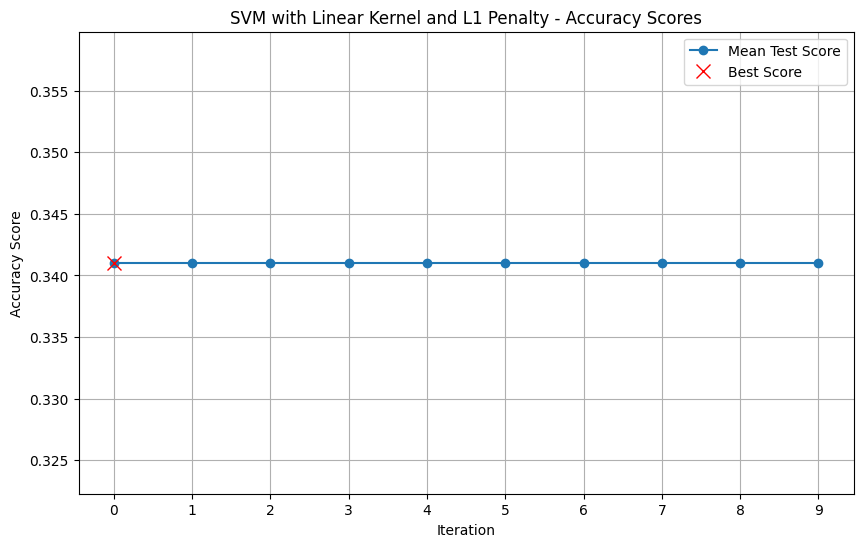

In [26]:
# Plot all accuracy scores for the SVM model with linear kernel and L1 penalty for each iteration
plt.figure(figsize=(10, 6))
plt.plot(convabuse_svm_linear_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the best score
convabuse_linear_best_score_index = np.argmax(convabuse_svm_linear_grid_search.cv_results_['mean_test_score'])
plt.plot(convabuse_linear_best_score_index, convabuse_svm_linear_grid_search.cv_results_['mean_test_score'][convabuse_linear_best_score_index], 'rx', markersize=10, label='Best Score')

plt.title('SVM with Linear Kernel and L1 Penalty - Accuracy Scores')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')
plt.xticks(range(len(convabuse_svm_linear_grid_search.cv_results_['mean_test_score'])))
plt.grid()
plt.legend()
plt.show()

In [27]:
# Print the best parameters and score from the grid search
print("Best parameters for SVM with linear kernel and L1 penalty:")
pprint(convabuse_svm_linear_grid_search.best_params_)
print("Best score for SVM with linear kernel and L1 penalty:")
print(convabuse_svm_linear_grid_search.best_score_)

Best parameters for SVM with linear kernel and L1 penalty:
{'C': np.float64(0.1), 'loss': 'squared_hinge', 'max_iter': 16, 'tol': 0.0001}
Best score for SVM with linear kernel and L1 penalty:
0.3410309677214495


In [28]:
# Train the SVM model with the best parameters
convabuse_svm_model_linear = svm.LinearSVC(**convabuse_svm_linear_grid_search.best_params_, random_state=42)
convabuse_svm_model_linear.fit(convabuse_X_train, convabuse_y_train)

LinearSVC(C=np.float64(0.1), max_iter=16, random_state=42)

In [29]:
# Print the classification report for the convabuse_svm_model_linear model
convabuse_y_pred_linear = convabuse_svm_model_linear.predict(convabuse_X_test)
print("Classification report for SVM with linear kernel and L1 penalty:")
print(classification_report(convabuse_y_test, convabuse_y_pred_linear))
print(f"F1 Score: {f1_score(convabuse_y_test, convabuse_y_pred_linear, average='weighted'):.4f}")
print(f"Accuracy: {accuracy_score(convabuse_y_test, convabuse_y_pred_linear):.4f}")

Classification report for SVM with linear kernel and L1 penalty:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2067
           1       0.28      0.99      0.44      1972
           2       0.57      0.25      0.34      2058
           3       0.00      0.00      0.00      2000
           4       0.39      0.45      0.41      1971

    accuracy                           0.33     10068
   macro avg       0.25      0.34      0.24     10068
weighted avg       0.25      0.33      0.24     10068

F1 Score: 0.2378
Accuracy: 0.3323


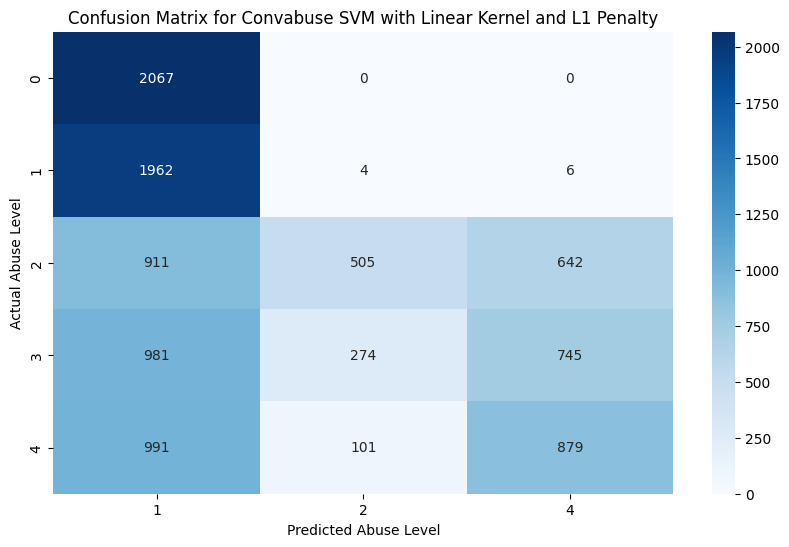

In [30]:
# Plot a heatmap of the actual vs predicted abuse levels for the convabuse_svm_model_linear model
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(convabuse_y_test, convabuse_y_pred_linear, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Convabuse SVM with Linear Kernel and L1 Penalty')
plt.xlabel('Predicted Abuse Level')
plt.ylabel('Actual Abuse Level')
plt.show()

In [31]:
svm_classification_results_list.append(("Convabuse", "Linear", "L1", accuracy_score(convabuse_y_test, convabuse_y_pred_linear), f1_score(convabuse_y_test, convabuse_y_pred_linear, average='weighted')))

In [32]:
convabuse_svm_rbf_pipeline = Pipeline([
    ("kernel", RBFSampler()),
    ("clf", SGDClassifier(loss="hinge", random_state=42, penalty="l2", tol=1e-4))
])

In [33]:
# Use grid search to find the best hyperparameters for the SVM model
convabuse_svm_rbf_param_grid = {
    'kernel__gamma': np.linspace(0.1, 1, 10), # Kernel coefficient,
    'kernel__n_components': range(2, convabuse_X_train.shape[1] + 1), # Number of components for the RBF kernel
    'clf__alpha': [1e-4], # Regularization parameter
    'clf__max_iter': [convabuse_max_iter], # range(330, 350), # Maximum number of iterations
    'clf__tol': [1e-4], # Tolerance for stopping criteria
    'clf__early_stopping': [True] # Whether to use early stopping
}

In [34]:
# Perform a grid search using the RBFSampler
convabuse_svm_rbf_grid_search = GridSearchCV(
    estimator=convabuse_svm_rbf_pipeline,
    param_grid=
    convabuse_svm_rbf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=2,
    verbose=True
)

In [35]:
# Fit the grid search to the training data
convabuse_svm_rbf_grid_search.fit(convabuse_X_train, convabuse_y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('kernel', RBFSampler()),
                                       ('clf',
                                        SGDClassifier(random_state=42,
                                                      tol=0.0001))]),
             n_jobs=2,
             param_grid={'clf__alpha': [0.0001], 'clf__early_stopping': [True],
                         'clf__max_iter': [16], 'clf__tol': [0.0001],
                         'kernel__gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'kernel__n_components': range(2, 10)},
             scoring='accuracy', verbose=True)

In [36]:
# Print the best parameters and score from the grid search
print("Best parameters for SVM with RBF kernel:")
pprint(convabuse_svm_rbf_grid_search.best_params_)
print("Best score for SVM with RBF kernel:")
print(convabuse_svm_rbf_grid_search.best_score_)

Best parameters for SVM with RBF kernel:
{'clf__alpha': 0.0001,
 'clf__early_stopping': True,
 'clf__max_iter': 16,
 'clf__tol': 0.0001,
 'kernel__gamma': np.float64(0.6),
 'kernel__n_components': 6}
Best score for SVM with RBF kernel:
0.3354437034807106


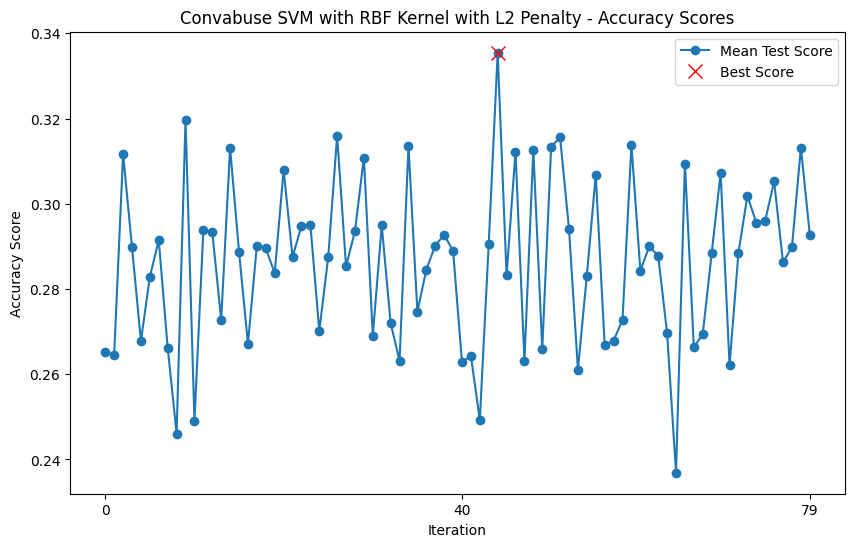

In [37]:
# Plot all accuracy scores for the SVM model with RBF kernel for each iteration
plt.figure(figsize=(10, 6))
plt.plot(convabuse_svm_rbf_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the best score
best_convabuse_svm_rbf_score_index = np.argmax(convabuse_svm_rbf_grid_search.cv_results_['mean_test_score'])
plt.plot(best_convabuse_svm_rbf_score_index, convabuse_svm_rbf_grid_search.cv_results_['mean_test_score'][best_convabuse_svm_rbf_score_index], 'rx', markersize=10, label='Best Score')

plt.title('Convabuse SVM with RBF Kernel with L2 Penalty - Accuracy Scores')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')

# Only plot x-axis ticks of 0, the median, and the last iteration
plt.xticks([0, len(convabuse_svm_rbf_grid_search.cv_results_['mean_test_score']) // 2, len(convabuse_svm_rbf_grid_search.cv_results_['mean_test_score']) - 1])

plt.legend()
plt.show()

In [38]:
# Train the SVM model with the best parameters
convabuse_svm_model_rbf = convabuse_svm_rbf_grid_search.best_estimator_
convabuse_svm_model_rbf.fit(convabuse_X_train, convabuse_y_train)

Pipeline(steps=[('kernel', RBFSampler(gamma=np.float64(0.6), n_components=6)),
                ('clf',
                 SGDClassifier(early_stopping=True, max_iter=16,
                               random_state=42, tol=0.0001))])

In [39]:
# Print the classification report for the convabuse_svm_model_rbf model
convabuse_y_pred_rbf = convabuse_svm_model_rbf.predict(convabuse_X_test)
print("Classification report for SVM with RBF kernel:")
print(classification_report(convabuse_y_test, convabuse_y_pred_rbf))
print(f"F1 Score: {f1_score(convabuse_y_test, convabuse_y_pred_rbf, average='weighted'):.4f}")
print(f"Accuracy: {accuracy_score(convabuse_y_test, convabuse_y_pred_rbf):.4f}")

Classification report for SVM with RBF kernel:
              precision    recall  f1-score   support

           0       0.30      1.00      0.46      2067
           1       0.00      0.00      0.00      1972
           2       0.57      0.24      0.34      2058
           3       0.53      0.00      0.01      2000
           4       0.39      0.45      0.41      1971

    accuracy                           0.34     10068
   macro avg       0.36      0.34      0.24     10068
weighted avg       0.36      0.34      0.25     10068

F1 Score: 0.2469
Accuracy: 0.3429


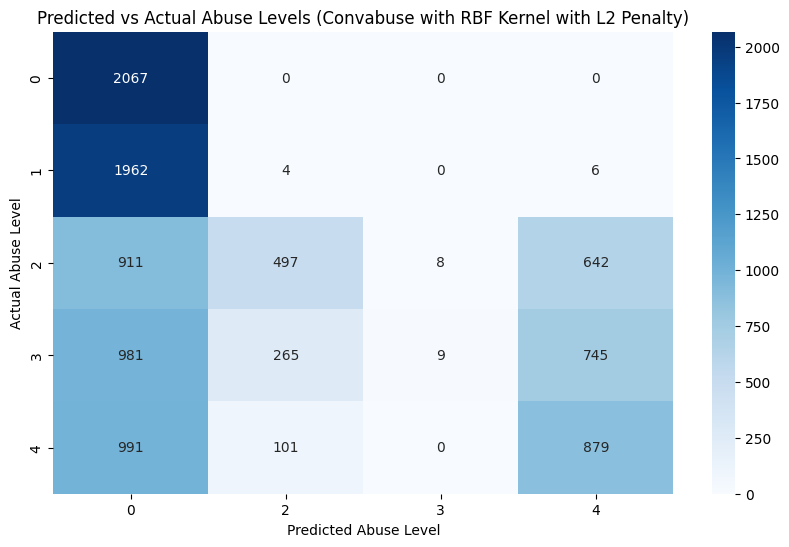

In [40]:
# Plot a heatmap of the predicted vs actual abuse levels
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(convabuse_y_test, convabuse_y_pred_rbf), annot=True, fmt='d', cmap='Blues')
plt.title('Predicted vs Actual Abuse Levels (Convabuse with RBF Kernel with L2 Penalty)')
plt.xlabel('Predicted Abuse Level')
plt.ylabel('Actual Abuse Level')
plt.show()

In [41]:
svm_classification_results_list.append(("Convabuse", "RBF", "L2", accuracy_score(convabuse_y_test, convabuse_y_pred_rbf), f1_score(convabuse_y_test, convabuse_y_pred_rbf, average='weighted')))

In [42]:
# Loop through the parameter grid and train the SVM model
def svm_grid_search(X_train, X_test, y_train, y_test, param_grid, model_name):
    """Train an SVM model using GridSearchCV and print the classification report."""
    # Create the SVM model
    svm_model = svm.SVC()

    # Create the GridSearchCV object
    grid_search = GridSearchCV(svm_model, param_grid, cv=2, scoring='accuracy', verbose=1, n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Print out the parameters that were tested:
    print(f"Parameters tested for {model_name}:")
    pprint(grid_search.cv_results_['params'])

    # Print the classification report
    print(f"Best parameters for {model_name}:", grid_search.best_params_)
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

    return grid_search, best_model # Return the grid_search object

In [43]:
convabuse_custom_param_grid = {
    "C": np.linspace(0.1, 1, 10),
    "kernel": ["linear"],
    "max_iter": [convabuse_max_iter], # range(2960, 3000),
    "class_weight": ["balanced"]
}

In [44]:
# Train and evaluate the SVM model on the US Accidents Upsampled dataset
convabuse_custom_svm_grid_search, convabuse_custom_svm_model = svm_grid_search(convabuse_X_train, convabuse_X_test, convabuse_y_train, convabuse_y_test, convabuse_custom_param_grid, "convabuse_custom_svm_model")

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Parameters tested for convabuse_custom_svm_model:
[{'C': np.float64(0.1),
  'class_weight': 'balanced',
  'kernel': 'linear',
  'max_iter': 16},
 {'C': np.float64(0.2),
  'class_weight': 'balanced',
  'kernel': 'linear',
  'max_iter': 16},
 {'C': np.float64(0.30000000000000004),
  'class_weight': 'balanced',
  'kernel': 'linear',
  'max_iter': 16},
 {'C': np.float64(0.4),
  'class_weight': 'balanced',
  'kernel': 'linear',
  'max_iter': 16},
 {'C': np.float64(0.5),
  'class_weight': 'balanced',
  'kernel': 'linear',
  'max_iter': 16},
 {'C': np.float64(0.6),
  'class_weight': 'balanced',
  'kernel': 'linear',
  'max_iter': 16},
 {'C': np.float64(0.7000000000000001),
  'class_weight': 'balanced',
  'kernel': 'linear',
  'max_iter': 16},
 {'C': np.float64(0.8),
  'class_weight': 'balanced',
  'kernel': 'linear',
  'max_iter': 16},
 {'C': np.float64(0.9),
  'class_weight': 'balanced',
  'kernel': 'linear',
  'max_iter': 16},
 {'

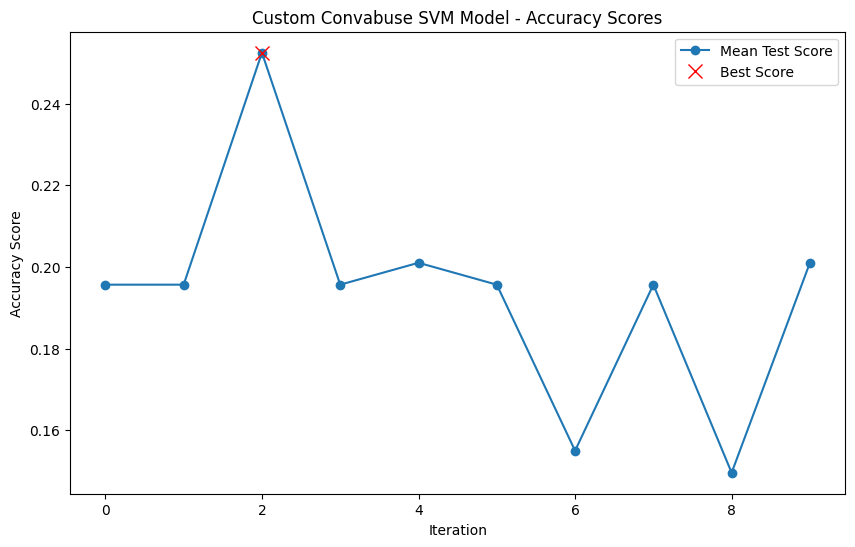

In [45]:
# Plot all accuracy scores for the custom SVM model
plt.figure(figsize=(10, 6))
plt.plot(convabuse_custom_svm_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the maximum accuracy score
best_convabuse_custom_svm_score_index = np.argmax(convabuse_custom_svm_grid_search.cv_results_['mean_test_score'])
plt.plot(best_convabuse_custom_svm_score_index, convabuse_custom_svm_grid_search.cv_results_['mean_test_score'][best_convabuse_custom_svm_score_index], 'rx', markersize=10, label='Best Score')

plt.title('Custom Convabuse SVM Model - Accuracy Scores')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [46]:
# Print the best parameters and score from the grid search using the pickled model
print("Best parameters for SVM with linear kernel and L1 penalty:")
pprint(convabuse_custom_svm_grid_search.best_params_)
print("Best score for SVM with linear kernel and L1 penalty:")
print(convabuse_custom_svm_grid_search.best_score_)

# Get the best kernel
best_convabuse_custom_kernel = convabuse_custom_svm_grid_search.best_params_['kernel']

Best parameters for SVM with linear kernel and L1 penalty:
{'C': np.float64(0.30000000000000004),
 'class_weight': 'balanced',
 'kernel': 'linear',
 'max_iter': 16}
Best score for SVM with linear kernel and L1 penalty:
0.25248311481922925


In [47]:
# Train the SVM model with the best parameters
convabuse_custom_svm_best_model = convabuse_custom_svm_grid_search.best_estimator_
convabuse_custom_svm_best_model.fit(convabuse_X_train, convabuse_y_train)

SVC(C=np.float64(0.30000000000000004), class_weight='balanced', kernel='linear',
    max_iter=16)

In [48]:
# Use the model to make predictions on the test set
convabuse_custom_y_pred = convabuse_custom_svm_model.predict(convabuse_X_test)

# Print the classification report
print("Classification report for Convabuse dataset with L1 regularization:")
print(classification_report(convabuse_y_test, convabuse_custom_y_pred))

Classification report for Convabuse dataset with L1 regularization:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2067
           1       0.00      0.00      0.00      1972
           2       0.00      0.00      0.00      2058
           3       0.00      0.00      0.00      2000
           4       0.20      1.00      0.33      1971

    accuracy                           0.20     10068
   macro avg       0.04      0.20      0.07     10068
weighted avg       0.04      0.20      0.06     10068



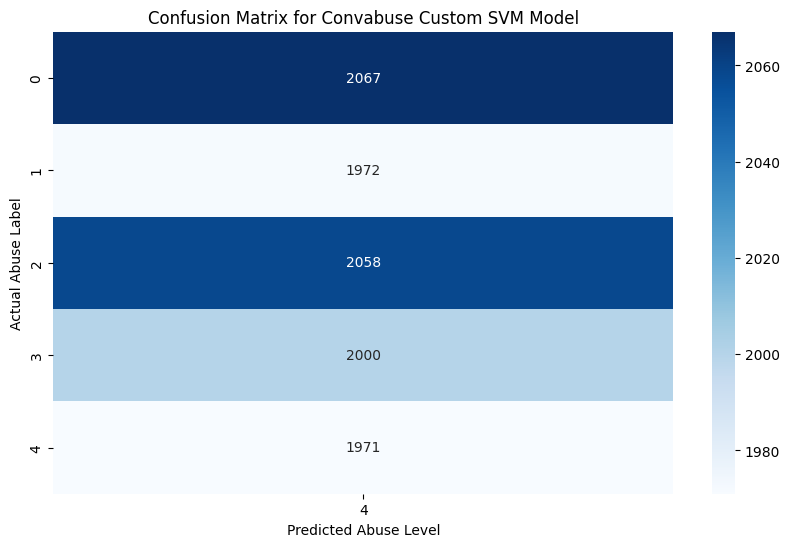

In [49]:
# Plot a heatmap of the predicted vs actual abuse levels
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(convabuse_y_test, convabuse_custom_y_pred, rownames=['Actual Abuse Label'], colnames=['Predicted Abuse Level']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Convabuse Custom SVM Model')
plt.show()

In [50]:
# Get the custom model's accuracy and f1-score
convabuse_custom_accuracy = accuracy_score(convabuse_y_test, convabuse_custom_y_pred)
convabuse_custom_f1_score = f1_score(convabuse_y_test, convabuse_custom_y_pred, average='weighted')
print(f"Custom SVM Model Accuracy: {convabuse_custom_accuracy}")
print(f"Custom SVM Model F1-Score: {convabuse_custom_f1_score}")

Custom SVM Model Accuracy: 0.19576877234803336
Custom SVM Model F1-Score: 0.06410171115507496


In [51]:
svm_classification_results_list.append(("Convabuse", best_convabuse_custom_kernel, "L1", convabuse_custom_accuracy, convabuse_custom_f1_score))

In [52]:
svm_classification_results_list

[('Convabuse', 'Linear', 'L1', 0.33234008740564164, 0.2378010774143733),
 ('Convabuse', 'RBF', 'L2', 0.3428684942391736, 0.2468735054913945),
 ('Convabuse', 'linear', 'L1', 0.19576877234803336, 0.06410171115507496)]

## Dynamicaly Generated Hate Speech Support Vector Machines

In [53]:
# Use grid search to find the best hyperparameters for the Linear SVC model
dghs_svm_linear_param_grid = {
    'C': np.linspace(0.1, 1, 10), # Regularization parameter
    'loss': ['squared_hinge'], # Loss function
    'max_iter': [dghs_max_iter], # range(1, 8), # Maximum number of iterations
    'tol': [1e-4] # Tolerance for stopping criteria
}

In [54]:
dghs_svm_linear_grid_search = GridSearchCV(svm.LinearSVC(), dghs_svm_linear_param_grid, cv=5, scoring='accuracy')
dghs_svm_linear_grid_search.fit(dghs_X_train, dghs_y_train)

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'loss': ['squared_hinge'], 'max_iter': [15],
                         'tol': [0.0001]},
             scoring='accuracy')

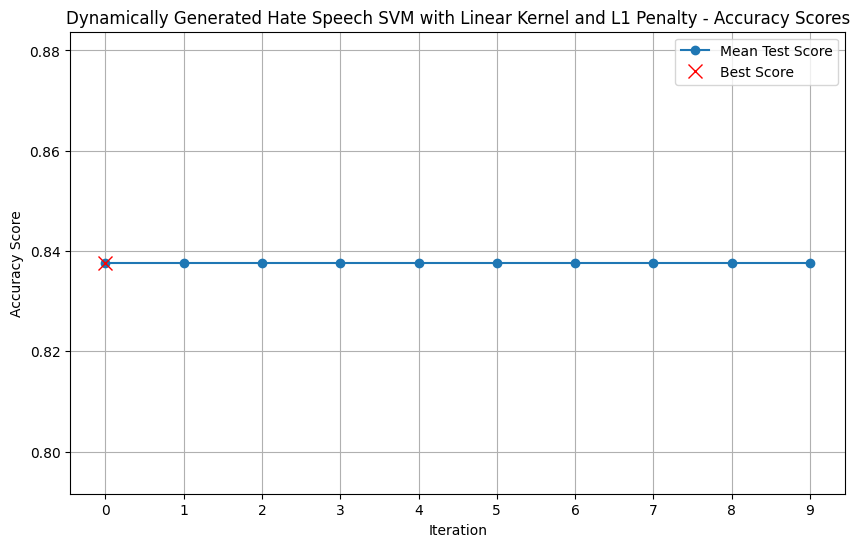

In [55]:
# Plot all accuracy scores for the SVM model with linear kernel and L1 penalty for each iteration
plt.figure(figsize=(10, 6))
plt.plot(dghs_svm_linear_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the best score
dghs_linear_best_score_index = np.argmax(dghs_svm_linear_grid_search.cv_results_['mean_test_score'])
plt.plot(dghs_linear_best_score_index, dghs_svm_linear_grid_search.cv_results_['mean_test_score'][dghs_linear_best_score_index], 'rx', markersize=10, label='Best Score')

plt.title('Dynamically Generated Hate Speech SVM with Linear Kernel and L1 Penalty - Accuracy Scores')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')
plt.xticks(range(len(dghs_svm_linear_grid_search.cv_results_['mean_test_score'])))
plt.grid()
plt.legend()
plt.show()

In [56]:
# Print the best parameters and score from the grid search using the pickled model
print("Best parameters for SVM with linear kernel and L1 penalty (from pickled model):")
pprint(dghs_svm_linear_grid_search.best_params_)
print("Best score for SVM with linear kernel and L1 penalty (from pickled model):")
print(dghs_svm_linear_grid_search.best_score_)

Best parameters for SVM with linear kernel and L1 penalty (from pickled model):
{'C': np.float64(0.1), 'loss': 'squared_hinge', 'max_iter': 15, 'tol': 0.0001}
Best score for SVM with linear kernel and L1 penalty (from pickled model):
0.8376606260296541


In [57]:
# Train the SVM model with the best parameters
dghs_svm_model_linear = svm.LinearSVC(**dghs_svm_linear_grid_search.best_params_, random_state=42)
dghs_svm_model_linear.fit(dghs_X_train, dghs_y_train)

LinearSVC(C=np.float64(0.1), max_iter=15, random_state=42)

In [58]:
# Print the classification report for the dghs_svm_model_linear model
dghs_y_pred_linear = dghs_svm_model_linear.predict(dghs_X_test)
print("Classification report for SVM with linear kernel and L1 penalty:")
print(classification_report(dghs_y_test, dghs_y_pred_linear))
print(f"F1 Score: {f1_score(dghs_y_test, dghs_y_pred_linear, average='weighted'):.4f}")
print(f"Accuracy: {accuracy_score(dghs_y_test, dghs_y_pred_linear):.4f}")

Classification report for SVM with linear kernel and L1 penalty:
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      3788
         1.0       1.00      0.67      0.80      3800

    accuracy                           0.83      7588
   macro avg       0.88      0.84      0.83      7588
weighted avg       0.88      0.83      0.83      7588

F1 Score: 0.8303
Accuracy: 0.8349


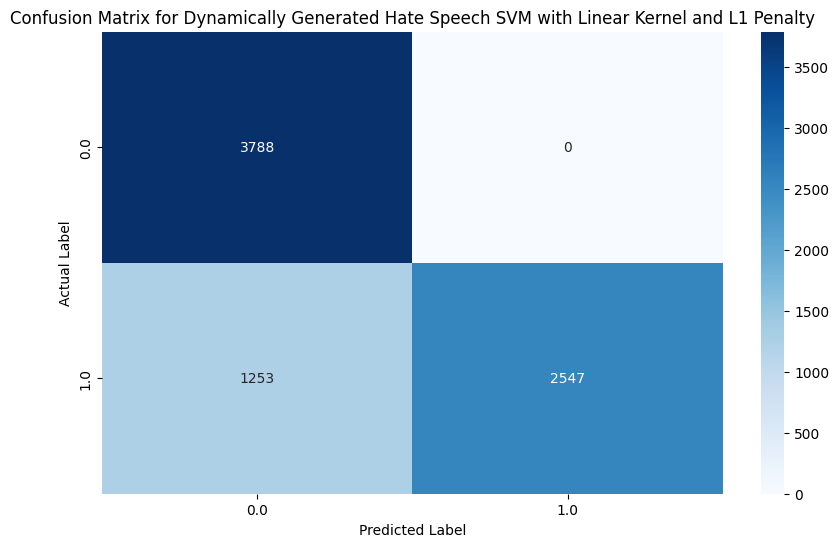

In [59]:
# Plot a heatmap of the actual vs predicted label for the us_accidents_svm_model_linear model
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(dghs_y_test, dghs_y_pred_linear, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Dynamically Generated Hate Speech SVM with Linear Kernel and L1 Penalty')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [60]:
svm_classification_results_list.append(("Dynamically Generated Hate Speech", "Linear", "L1", accuracy_score(dghs_y_test, dghs_y_pred_linear), f1_score(dghs_y_test, dghs_y_pred_linear, average='weighted')))

In [61]:
dghs_svm_rbf_pipeline = Pipeline([
    ("kernel", RBFSampler()),
    ("clf", SGDClassifier(loss="hinge", random_state=42, penalty="l2", tol=1e-4))
])

In [62]:
# Use grid search to find the best hyperparameters for the SVM model
dghs_svm_rbf_param_grid = {
    'kernel__gamma': np.linspace(0.1, 1, 10), # Kernel coefficient,
    'kernel__n_components': range(2, dghs_X_train.shape[1] + 1), # Number of components for the RBF kernel
    'clf__alpha': [1e-4], # Regularization parameter
    'clf__max_iter': [dghs_max_iter], # range(300, 350), # Maximum number of iterations
    'clf__tol': [1e-4], # Tolerance for stopping criteria
    'clf__early_stopping': [True] # Whether to use early stopping
}

In [63]:
# Perform a grid search using the RBFSampler
dghs_svm_rbf_grid_search = GridSearchCV(
    estimator=dghs_svm_rbf_pipeline,
    param_grid=
    dghs_svm_rbf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=2,
    verbose=True
)

In [64]:
# Fit the grid search to the training data
dghs_svm_rbf_grid_search.fit(dghs_X_train, dghs_y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('kernel', RBFSampler()),
                                       ('clf',
                                        SGDClassifier(random_state=42,
                                                      tol=0.0001))]),
             n_jobs=2,
             param_grid={'clf__alpha': [0.0001], 'clf__early_stopping': [True],
                         'clf__max_iter': [15], 'clf__tol': [0.0001],
                         'kernel__gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'kernel__n_components': range(2, 12)},
             scoring='accuracy', verbose=True)

In [65]:
# Print the best parameters and score from the grid search using the pickled model
print("Best parameters for SVM with RBF kernel (from pickled model):")
pprint(dghs_svm_rbf_grid_search.best_params_)
print("Best score for SVM with RBF kernel (from pickled model):")
print(dghs_svm_rbf_grid_search.best_score_)

Best parameters for SVM with RBF kernel (from pickled model):
{'clf__alpha': 0.0001,
 'clf__early_stopping': True,
 'clf__max_iter': 15,
 'clf__tol': 0.0001,
 'kernel__gamma': np.float64(0.1),
 'kernel__n_components': 5}
Best score for SVM with RBF kernel (from pickled model):
0.8376606260296541


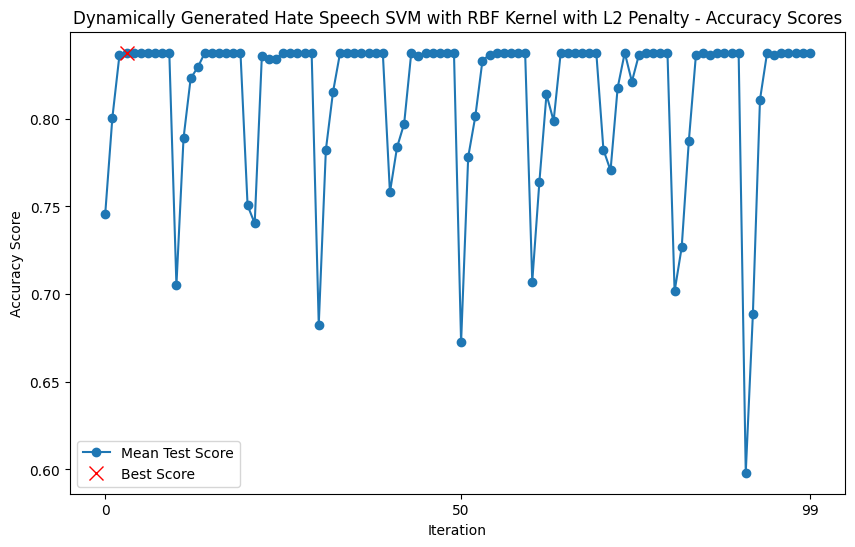

In [66]:
# Plot all accuracy scores for the SVM model with RBF kernel for each iteration
plt.figure(figsize=(10, 6))
plt.plot(dghs_svm_rbf_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the best score
best_dghs_svm_rbf_score_index = np.argmax(dghs_svm_rbf_grid_search.cv_results_['mean_test_score'])
plt.plot(best_dghs_svm_rbf_score_index, dghs_svm_rbf_grid_search.cv_results_['mean_test_score'][best_dghs_svm_rbf_score_index], 'rx', markersize=10, label='Best Score')

plt.title('Dynamically Generated Hate Speech SVM with RBF Kernel with L2 Penalty - Accuracy Scores')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')

# Only plot x-axis ticks of 0, the median, and the last iteration
plt.xticks([0, len(dghs_svm_rbf_grid_search.cv_results_['mean_test_score']) // 2, len(dghs_svm_rbf_grid_search.cv_results_['mean_test_score']) - 1])

plt.legend()
plt.show()

In [67]:
# Train the SVM model with the best parameters
dghs_svm_model_rbf = dghs_svm_rbf_grid_search.best_estimator_
dghs_svm_model_rbf.fit(dghs_X_train, dghs_y_train)

Pipeline(steps=[('kernel', RBFSampler(gamma=np.float64(0.1), n_components=5)),
                ('clf',
                 SGDClassifier(early_stopping=True, max_iter=15,
                               random_state=42, tol=0.0001))])

In [68]:
# Print the classification report for the dghs_svm_model_rbf model
dghs_y_pred_rbf = dghs_svm_model_rbf.predict(dghs_X_test)
print("Classification report for SVM with RBF kernel:")
print(classification_report(dghs_y_test, dghs_y_pred_rbf))
print(f"F1 Score: {f1_score(dghs_y_test, dghs_y_pred_rbf, average='weighted'):.4f}")
print(f"Accuracy: {accuracy_score(dghs_y_test, dghs_y_pred_rbf):.4f}")

Classification report for SVM with RBF kernel:
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      3788
         1.0       1.00      0.67      0.80      3800

    accuracy                           0.83      7588
   macro avg       0.88      0.84      0.83      7588
weighted avg       0.88      0.83      0.83      7588

F1 Score: 0.8303
Accuracy: 0.8349


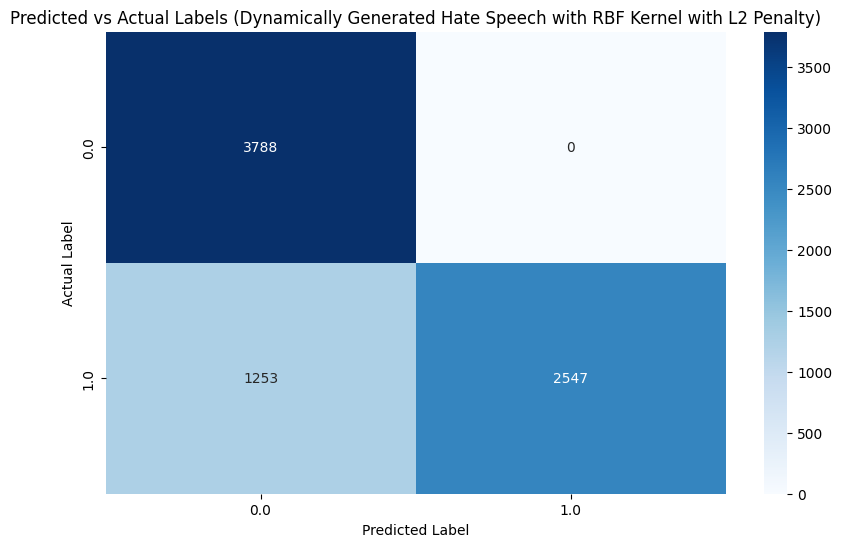

In [69]:
# Plot a heatmap of the predicted vs actual labels
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(dghs_y_test, dghs_y_pred_rbf), annot=True, fmt='d', cmap='Blues')
plt.title('Predicted vs Actual Labels (Dynamically Generated Hate Speech with RBF Kernel with L2 Penalty)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [70]:
svm_classification_results_list.append(("Dynamically Generated Hate Speech", "RBF", "L2", accuracy_score(dghs_y_test, dghs_y_pred_rbf), f1_score(dghs_y_test, dghs_y_pred_rbf, average='weighted')))

In [71]:
# Loop through the parameter grid and train the SVM model
def svm_grid_search(X_train, X_test, y_train, y_test, param_grid, model_name):
    """Train an SVM model using GridSearchCV and print the classification report."""
    # Create the SVM model
    svm_model = svm.SVC()

    # Create the GridSearchCV object
    grid_search = GridSearchCV(svm_model, param_grid, cv=2, scoring='accuracy', verbose=1, n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Print out the parameters that were tested:
    print(f"Parameters tested for {model_name}:")
    pprint(grid_search.cv_results_['params'])

    # Print the classification report
    print(f"Best parameters for {model_name}:", grid_search.best_params_)
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

    return grid_search, best_model # Return the grid_search object

In [72]:
dghs_custom_param_grid = {
    "C": np.linspace(0.1, 1, 10),
    "kernel": ["linear", "poly", "rbf"],
    "max_iter": [dghs_max_iter] , # range(100, 1000, 100),
    "class_weight": [None]
}

In [73]:
# Train and evaluate the SVM model on the US Accidents Upsampled dataset
dghs_custom_svm_grid_search, dghs_custom_svm_model = svm_grid_search(dghs_X_train, dghs_X_test, dghs_y_train, dghs_y_test, dghs_custom_param_grid, "dghs_custom_svm_model")

Fitting 2 folds for each of 30 candidates, totalling 60 fits
Parameters tested for dghs_custom_svm_model:
[{'C': np.float64(0.1),
  'class_weight': None,
  'kernel': 'linear',
  'max_iter': 15},
 {'C': np.float64(0.1), 'class_weight': None, 'kernel': 'poly', 'max_iter': 15},
 {'C': np.float64(0.1), 'class_weight': None, 'kernel': 'rbf', 'max_iter': 15},
 {'C': np.float64(0.2),
  'class_weight': None,
  'kernel': 'linear',
  'max_iter': 15},
 {'C': np.float64(0.2), 'class_weight': None, 'kernel': 'poly', 'max_iter': 15},
 {'C': np.float64(0.2), 'class_weight': None, 'kernel': 'rbf', 'max_iter': 15},
 {'C': np.float64(0.30000000000000004),
  'class_weight': None,
  'kernel': 'linear',
  'max_iter': 15},
 {'C': np.float64(0.30000000000000004),
  'class_weight': None,
  'kernel': 'poly',
  'max_iter': 15},
 {'C': np.float64(0.30000000000000004),
  'class_weight': None,
  'kernel': 'rbf',
  'max_iter': 15},
 {'C': np.float64(0.4),
  'class_weight': None,
  'kernel': 'linear',
  'max_iter': 

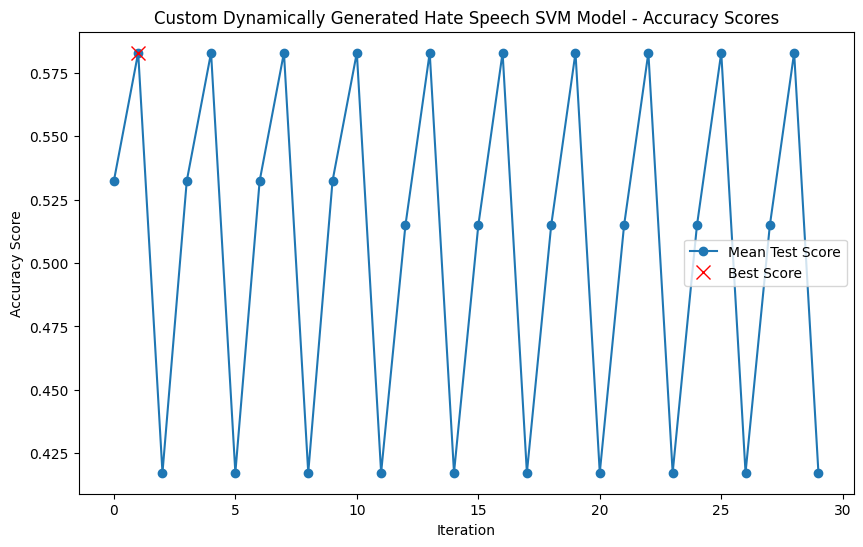

In [74]:
# Plot all accuracy scores for the custom SVM model
plt.figure(figsize=(10, 6))
plt.plot(dghs_custom_svm_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the maximum accuracy score
best_dghs_custom_svm_score_index = np.argmax(dghs_custom_svm_grid_search.cv_results_['mean_test_score'])
plt.plot(best_dghs_custom_svm_score_index, dghs_custom_svm_grid_search.cv_results_['mean_test_score'][best_dghs_custom_svm_score_index], 'rx', markersize=10, label='Best Score')

plt.title('Custom Dynamically Generated Hate Speech SVM Model - Accuracy Scores')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [75]:
# Print the best parameters and score from the grid search using the pickled model
print("Best parameters for SVM with linear kernel and L1 penalty (from pickled model):")
pprint(dghs_custom_svm_grid_search.best_params_)
print("Best score for SVM with linear kernel and L1 penalty (from pickled model):")
print(dghs_custom_svm_grid_search.best_score_)

# Get the best kernel
best_dghs_custom_kernel = dghs_custom_svm_grid_search.best_params_['kernel']
print(f"Best kernel: {best_dghs_custom_kernel}")

Best parameters for SVM with linear kernel and L1 penalty (from pickled model):
{'C': np.float64(0.1), 'class_weight': None, 'kernel': 'poly', 'max_iter': 15}
Best score for SVM with linear kernel and L1 penalty (from pickled model):
0.5828665568369028
Best kernel: poly


In [76]:
# Train the SVM model with the best parameters
dghs_custom_svm_best_model = dghs_custom_svm_grid_search.best_estimator_
dghs_custom_svm_best_model.fit(dghs_X_train, dghs_y_train)

SVC(C=np.float64(0.1), kernel='poly', max_iter=15)

In [77]:
# Use the model to make predictions on the test set
dghs_custom_y_pred = dghs_custom_svm_model.predict(dghs_X_test)

# Print the classification report
print("Classification report for US Accidents Upsampled dataset with L1 regularization:")
print(classification_report(dghs_y_test, dghs_custom_y_pred))

Classification report for US Accidents Upsampled dataset with L1 regularization:
              precision    recall  f1-score   support

         0.0       0.65      0.40      0.49      3788
         1.0       0.57      0.79      0.66      3800

    accuracy                           0.59      7588
   macro avg       0.61      0.59      0.57      7588
weighted avg       0.61      0.59      0.57      7588



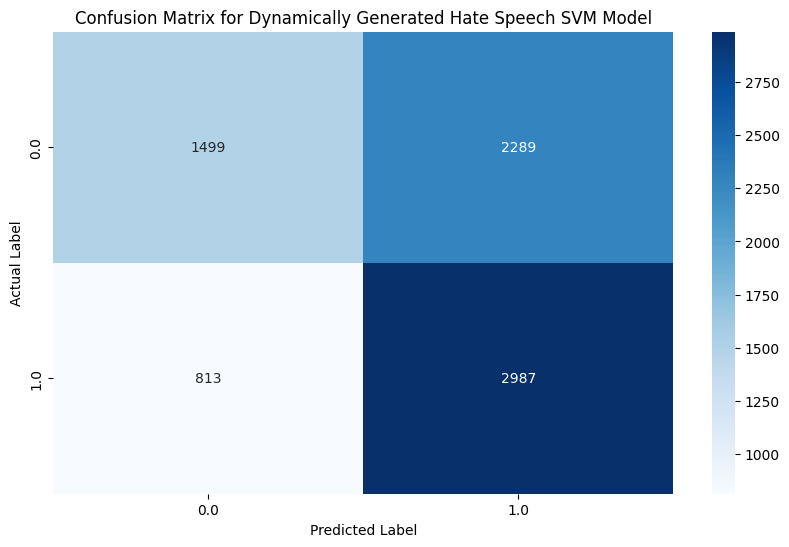

In [78]:
# Plot a heatmap of the predicted vs actual labels
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(dghs_y_test, dghs_custom_y_pred, rownames=['Actual Label'], colnames=['Predicted Label']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Dynamically Generated Hate Speech SVM Model')
plt.show()

In [79]:
# Get the custom model's accuracy and f1-score
dghs_custom_accuracy = accuracy_score(dghs_y_test, dghs_custom_y_pred)
dghs_custom_f1_score = f1_score(dghs_y_test, dghs_custom_y_pred, average='weighted')
print(f"Custom SVM Model Accuracy: {dghs_custom_accuracy}")
print(f"Custom SVM Model F1-Score: {dghs_custom_f1_score}")

Custom SVM Model Accuracy: 0.5911966262519768
Custom SVM Model F1-Score: 0.5749792931283668


In [80]:
svm_classification_results_list.append(("Dynamically Generated Hate Speech", best_dghs_custom_kernel, "L1", dghs_custom_accuracy, dghs_custom_f1_score))

In [81]:
svm_classification_results_list

[('Convabuse', 'Linear', 'L1', 0.33234008740564164, 0.2378010774143733),
 ('Convabuse', 'RBF', 'L2', 0.3428684942391736, 0.2468735054913945),
 ('Convabuse', 'linear', 'L1', 0.19576877234803336, 0.06410171115507496),
 ('Dynamically Generated Hate Speech',
  'Linear',
  'L1',
  0.834870848708487,
  0.8302887273632195),
 ('Dynamically Generated Hate Speech',
  'RBF',
  'L2',
  0.834870848708487,
  0.8302887273632195),
 ('Dynamically Generated Hate Speech',
  'poly',
  'L1',
  0.5911966262519768,
  0.5749792931283668)]

## Online Abusive Attacks Support Vector Machines

In [82]:
# Use grid search to find the best hyperparameters for the Linear SVC model
oaa_svm_linear_param_grid = {
    'C': np.linspace(0.1, 1, 10), # Regularization parameter
    'loss': ['squared_epsilon_insensitive', 'epsilon_insensitive'], # Loss function
    'max_iter': [oaa_max_iter], # range(100, 1000, 100), # Maximum number of iterations
    'tol': [1e-4] # Tolerance for stopping criteria
}

In [83]:
oaa_svm_linear_grid_search = GridSearchCV(svm.LinearSVR(), oaa_svm_linear_param_grid, cv=5, scoring='r2')
oaa_svm_linear_grid_search.fit(oaa_X_train, oaa_y_train)

GridSearchCV(cv=5, estimator=LinearSVR(),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'loss': ['squared_epsilon_insensitive',
                                  'epsilon_insensitive'],
                         'max_iter': [11], 'tol': [0.0001]},
             scoring='r2')

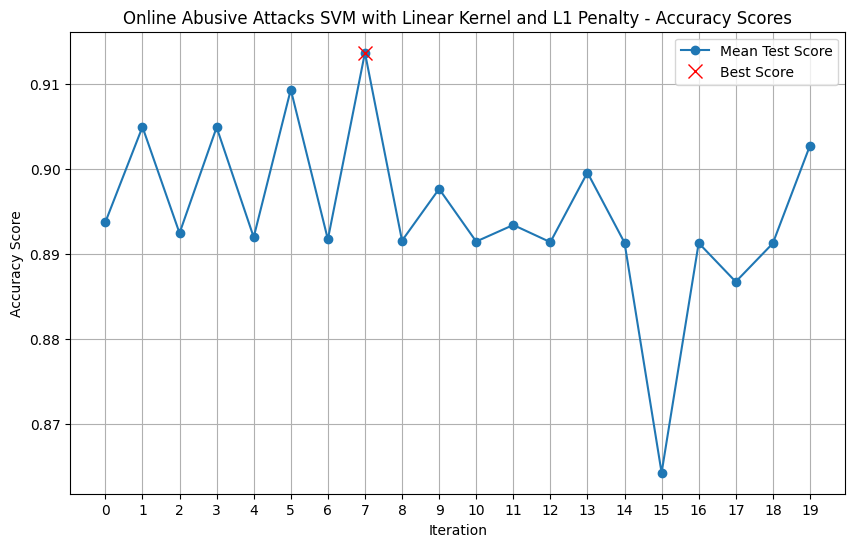

In [84]:
# Plot all accuracy scores for the SVM model with linear kernel and L1 penalty for each iteration
plt.figure(figsize=(10, 6))
plt.plot(oaa_svm_linear_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the best score
oaa_linear_best_score_index = np.argmax(oaa_svm_linear_grid_search.cv_results_['mean_test_score'])
plt.plot(oaa_linear_best_score_index, oaa_svm_linear_grid_search.cv_results_['mean_test_score'][oaa_linear_best_score_index], 'rx', markersize=10, label='Best Score')

plt.title('Online Abusive Attacks SVM with Linear Kernel and L1 Penalty - Accuracy Scores')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')
plt.xticks(range(len(oaa_svm_linear_grid_search.cv_results_['mean_test_score'])))
plt.grid()
plt.legend()
plt.show()

In [85]:
# Print the best parameters and score from the grid search
print("Best parameters for SVM with linear kernel and L1 penalty:")
pprint(oaa_svm_linear_grid_search.best_params_)
print("Best score for SVM with linear kernel and L1 penalty:")
print(oaa_svm_linear_grid_search.best_score_)

Best parameters for SVM with linear kernel and L1 penalty:
{'C': np.float64(0.4),
 'loss': 'epsilon_insensitive',
 'max_iter': 11,
 'tol': 0.0001}
Best score for SVM with linear kernel and L1 penalty:
0.9137099312373145


In [86]:
# Train the SVM model with the best parameters
oaa_svm_model_linear = svm.LinearSVR(**oaa_svm_linear_grid_search.best_params_, random_state=42)
oaa_svm_model_linear.fit(oaa_X_train, oaa_y_train)

LinearSVR(C=np.float64(0.4), max_iter=11, random_state=42)

In [87]:
# Print the RMSE and R2 for the oaa_svm_model_linear model
oaa_y_pred_linear = oaa_svm_model_linear.predict(oaa_X_test)
print("RMSE for SVM with linear kernel and L1 penalty:")
print(root_mean_squared_error(oaa_y_test, oaa_y_pred_linear))
print("R2 for SVM with linear kernel and L1 penalty:")
print(r2_score(oaa_y_test, oaa_y_pred_linear))

RMSE for SVM with linear kernel and L1 penalty:
5.389867615187648
R2 for SVM with linear kernel and L1 penalty:
0.8778624436630365


In [88]:
svm_regression_results_list.append(("Online Abusive Attacks", "Linear", "L1", root_mean_squared_error(oaa_y_test, oaa_y_pred_linear), r2_score(oaa_y_test, oaa_y_pred_linear)))

In [89]:
# Loop through the parameter grid and train the SVM model
def svm_reg_grid_search(X_train, X_test, y_train, y_test, param_grid, model_name):
    """Train an SVM model using GridSearchCV and print the regression scores."""
    # Create the SVM model
    svm_model = svm.SVR()

    # Create the GridSearchCV object
    grid_search = GridSearchCV(svm_model, param_grid, cv=2, scoring='r2', verbose=1, n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Print out the parameters that were tested:
    print(f"Parameters tested for {model_name}:")
    pprint(grid_search.cv_results_['params'])

    # Print the RMSE and R2 score
    print(f"Best parameters for {model_name}:", grid_search.best_params_)
    print(f"RMSE: {root_mean_squared_error(y_test, y_pred):.4f}")
    print(f"R2: {r2_score(y_test, y_pred):.4f}")

    return grid_search, best_model # Return the grid_search object

In [90]:
oaa_custom_param_grid = {
    "C": np.linspace(0.1, 1, 10),
    "kernel": ["linear", "poly", "rbf"],
    "max_iter": [oaa_max_iter] # range(1200, 1230)
}

In [91]:
# Train and evaluate the SVM model on the US Accidents Upsampled dataset
oaa_custom_svm_grid_search, oaa_custom_svm_model = svm_reg_grid_search(oaa_X_train, oaa_X_test, oaa_y_train, oaa_y_test, oaa_custom_param_grid, "oaa_custom_svm_model")

Fitting 2 folds for each of 30 candidates, totalling 60 fits
Parameters tested for oaa_custom_svm_model:
[{'C': np.float64(0.1), 'kernel': 'linear', 'max_iter': 11},
 {'C': np.float64(0.1), 'kernel': 'poly', 'max_iter': 11},
 {'C': np.float64(0.1), 'kernel': 'rbf', 'max_iter': 11},
 {'C': np.float64(0.2), 'kernel': 'linear', 'max_iter': 11},
 {'C': np.float64(0.2), 'kernel': 'poly', 'max_iter': 11},
 {'C': np.float64(0.2), 'kernel': 'rbf', 'max_iter': 11},
 {'C': np.float64(0.30000000000000004), 'kernel': 'linear', 'max_iter': 11},
 {'C': np.float64(0.30000000000000004), 'kernel': 'poly', 'max_iter': 11},
 {'C': np.float64(0.30000000000000004), 'kernel': 'rbf', 'max_iter': 11},
 {'C': np.float64(0.4), 'kernel': 'linear', 'max_iter': 11},
 {'C': np.float64(0.4), 'kernel': 'poly', 'max_iter': 11},
 {'C': np.float64(0.4), 'kernel': 'rbf', 'max_iter': 11},
 {'C': np.float64(0.5), 'kernel': 'linear', 'max_iter': 11},
 {'C': np.float64(0.5), 'kernel': 'poly', 'max_iter': 11},
 {'C': np.float

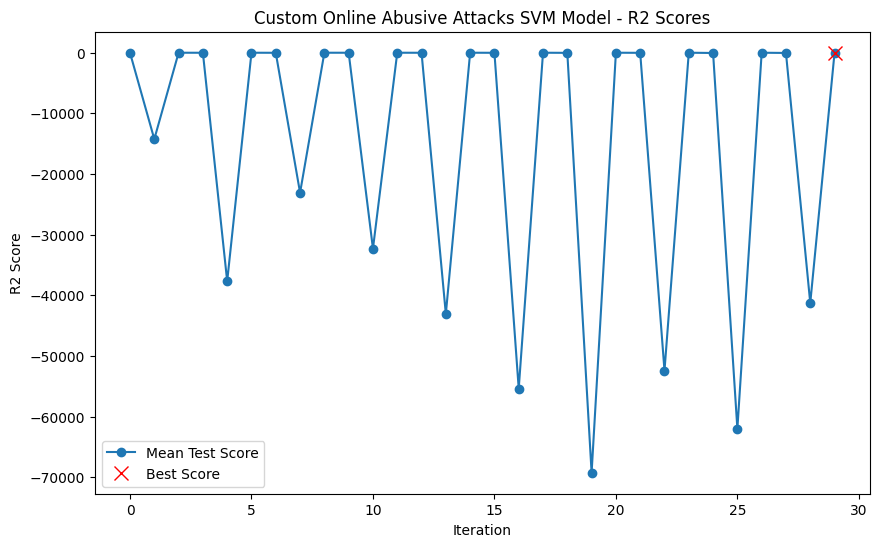

In [92]:
# Plot all R2 scores for the custom SVM model
plt.figure(figsize=(10, 6))
plt.plot(oaa_custom_svm_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the maximum R2 score
best_oaa_custom_svm_score_index = np.argmax(oaa_custom_svm_grid_search.cv_results_['mean_test_score'])
plt.plot(best_oaa_custom_svm_score_index, oaa_custom_svm_grid_search.cv_results_['mean_test_score'][best_oaa_custom_svm_score_index], 'rx', markersize=10, label='Best Score')

plt.title('Custom Online Abusive Attacks SVM Model - R2 Scores')
plt.xlabel('Iteration')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

In [93]:
# Print the best parameters and score from the grid search
print("Best parameters for SVM with linear kernel and L1 penalty:")
pprint(oaa_custom_svm_grid_search.best_params_)
print("Best score for SVM with linear kernel and L1 penalty:")
print(oaa_custom_svm_grid_search.best_score_)

# Get the best kernel
best_oaa_custom_kernel = oaa_custom_svm_grid_search.best_params_['kernel']

Best parameters for SVM with linear kernel and L1 penalty:
{'C': np.float64(1.0), 'kernel': 'rbf', 'max_iter': 11}
Best score for SVM with linear kernel and L1 penalty:
-0.5590151378470068


In [94]:
# Train the SVM model with the best parameters
oaa_custom_svm_best_params = oaa_custom_svm_grid_search.best_params_.copy()
oaa_custom_svm_best_params.pop('kernel', None) # Remove the kernel key if it exists
oaa_custom_svm_best_model = oaa_custom_svm_grid_search.best_estimator_
oaa_custom_svm_best_model.fit(oaa_X_train, oaa_y_train)

SVR(C=np.float64(1.0), max_iter=11)

In [95]:
# Use the model to make predictions on the test set
oaa_custom_y_pred = oaa_custom_svm_model.predict(oaa_X_test)

# Print the RMSE and R2 scores:
print("RMSE for SVM with linear kernel and L1 penalty:")
print(root_mean_squared_error(oaa_y_test, oaa_custom_y_pred))
print("R2 for SVM with linear kernel and L1 penalty:")
print(r2_score(oaa_y_test, oaa_custom_y_pred))

# Get the best kernel
best_oaa_custom_kernel = oaa_custom_svm_grid_search.best_params_['kernel']

RMSE for SVM with linear kernel and L1 penalty:
17.499677219998848
R2 for SVM with linear kernel and L1 penalty:
-0.28751739875851157


In [96]:
svm_regression_results_list.append(("Online Abusive Attacks", best_oaa_custom_kernel, "L1", root_mean_squared_error(oaa_y_test, oaa_custom_y_pred), r2_score(oaa_y_test, oaa_custom_y_pred)))

In [97]:
svm_regression_results_list

[('Online Abusive Attacks',
  'Linear',
  'L1',
  5.389867615187648,
  0.8778624436630365),
 ('Online Abusive Attacks',
  'rbf',
  'L1',
  17.499677219998848,
  -0.28751739875851157)]

## US Elections 2020 Hate Speech Support Vector Machines

In [98]:
# Use grid search to find the best hyperparameters for the Linear SVC model
us2020hs_svm_linear_param_grid = {
    'C': np.linspace(0.1, 1, 10), # Regularization parameter
    'loss': ['squared_hinge'], # Loss function
    'max_iter': [us2020hs_max_iter], # range(2, 10), # Maximum number of iterations
    'tol': [1e-4] # Tolerance for stopping criteria
}

In [99]:
us2020hs_svm_linear_grid_search = GridSearchCV(svm.LinearSVC(), us2020hs_svm_linear_param_grid, cv=5, scoring='accuracy')
us2020hs_svm_linear_grid_search.fit(us2020hs_X_train, us2020hs_y_train)

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'loss': ['squared_hinge'], 'max_iter': [13],
                         'tol': [0.0001]},
             scoring='accuracy')

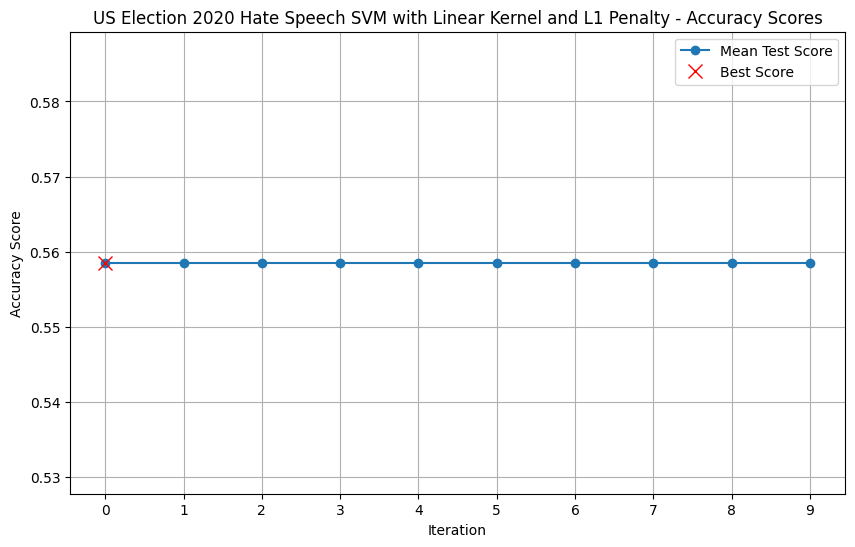

In [100]:
# Plot all accuracy scores for the SVM model with linear kernel and L1 penalty for each iteration
plt.figure(figsize=(10, 6))
plt.plot(us2020hs_svm_linear_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the best score
us2020hs_linear_best_score_index = np.argmax(us2020hs_svm_linear_grid_search.cv_results_['mean_test_score'])
plt.plot(us2020hs_linear_best_score_index, us2020hs_svm_linear_grid_search.cv_results_['mean_test_score'][us2020hs_linear_best_score_index], 'rx', markersize=10, label='Best Score')

plt.title('US Election 2020 Hate Speech SVM with Linear Kernel and L1 Penalty - Accuracy Scores')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')
plt.xticks(range(len(us2020hs_svm_linear_grid_search.cv_results_['mean_test_score'])))
plt.grid()
plt.legend()
plt.show()

In [101]:
# Print the best parameters and score from the grid search
print("Best parameters for SVM with linear kernel and L1 penalty:")
pprint(us2020hs_svm_linear_grid_search.best_params_)
print("Best score for SVM with linear kernel and L1 penalty:")
print(us2020hs_svm_linear_grid_search.best_score_)

Best parameters for SVM with linear kernel and L1 penalty:
{'C': np.float64(0.1), 'loss': 'squared_hinge', 'max_iter': 13, 'tol': 0.0001}
Best score for SVM with linear kernel and L1 penalty:
0.5585462564879375


In [102]:
# Train the SVM model with the best parameters
us2020hs_svm_model_linear = svm.LinearSVC(**us2020hs_svm_linear_grid_search.best_params_, random_state=42)
us2020hs_svm_model_linear.fit(us2020hs_X_train, us2020hs_y_train)

LinearSVC(C=np.float64(0.1), max_iter=13, random_state=42)

In [103]:
# Print the classification report for the us2020hs_svm_model_linear model
us2020hs_y_pred_linear = us2020hs_svm_model_linear.predict(us2020hs_X_test)
print("Classification report for SVM with linear kernel and L1 penalty:")
print(classification_report(us2020hs_y_test, us2020hs_y_pred_linear))
print(f"F1 Score: {f1_score(us2020hs_y_test, us2020hs_y_pred_linear, average='weighted'):.4f}")
print(f"Accuracy: {accuracy_score(us2020hs_y_test, us2020hs_y_pred_linear):.4f}")

Classification report for SVM with linear kernel and L1 penalty:
              precision    recall  f1-score   support

           0       0.56      0.53      0.55       515
           1       0.58      0.61      0.60       545

    accuracy                           0.57      1060
   macro avg       0.57      0.57      0.57      1060
weighted avg       0.57      0.57      0.57      1060

F1 Score: 0.5709
Accuracy: 0.5717


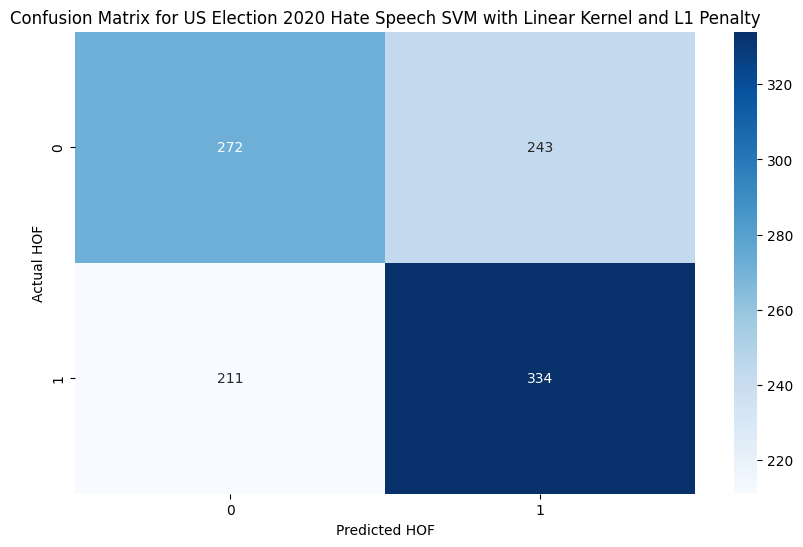

In [104]:
# Plot a heatmap of the actual vs predicted HOF for the us_accidents_svm_model_linear model
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(us2020hs_y_test, us2020hs_y_pred_linear, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for US Election 2020 Hate Speech SVM with Linear Kernel and L1 Penalty')
plt.xlabel('Predicted HOF')
plt.ylabel('Actual HOF')
plt.show()

In [105]:
svm_classification_results_list.append(("US Elections 2020 Election Hate Speech", "Linear", "L1", accuracy_score(us2020hs_y_test, us2020hs_y_pred_linear), f1_score(us2020hs_y_test, us2020hs_y_pred_linear, average='weighted')))

In [106]:
us2020hs_svm_rbf_pipeline = Pipeline([
    ("kernel", RBFSampler()),
    ("clf", SGDClassifier(loss="hinge", random_state=42, penalty="l2", tol=1e-4))
])

In [107]:
# Use grid search to find the best hyperparameters for the SVM model
us2020hs_svm_rbf_param_grid = {
    'kernel__gamma': np.linspace(0.1, 1, 10), # Kernel coefficient,
    'kernel__n_components': range(2, us2020hs_X_train.shape[1] + 1), # Number of components for the RBF kernel
    'clf__alpha': [1e-4], # Regularization parameter
    'clf__max_iter': [us2020hs_max_iter], # range(820, 840), # Maximum number of iterations
    'clf__tol': [1e-4], # Tolerance for stopping criteria
    'clf__early_stopping': [True] # Whether to use early stopping
}

In [108]:
# Perform a grid search using the RBFSampler
us2020hs_svm_rbf_grid_search = GridSearchCV(
    estimator=us2020hs_svm_rbf_pipeline,
    param_grid=
    us2020hs_svm_rbf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=2,
    verbose=True
)

In [109]:
# Fit the grid search to the training data
us2020hs_svm_rbf_grid_search.fit(us2020hs_X_train, us2020hs_y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('kernel', RBFSampler()),
                                       ('clf',
                                        SGDClassifier(random_state=42,
                                                      tol=0.0001))]),
             n_jobs=2,
             param_grid={'clf__alpha': [0.0001], 'clf__early_stopping': [True],
                         'clf__max_iter': [13], 'clf__tol': [0.0001],
                         'kernel__gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'kernel__n_components': range(2, 3)},
             scoring='accuracy', verbose=True)

In [110]:
# Print the best parameters and score from the grid search
print("Best parameters for SVM with RBF kernel:")
pprint(us2020hs_svm_rbf_grid_search.best_params_)
print("Best score for SVM with RBF kernel:")
print(us2020hs_svm_rbf_grid_search.best_score_)

Best parameters for SVM with RBF kernel:
{'clf__alpha': 0.0001,
 'clf__early_stopping': True,
 'clf__max_iter': 13,
 'clf__tol': 0.0001,
 'kernel__gamma': np.float64(1.0),
 'kernel__n_components': 2}
Best score for SVM with RBF kernel:
0.5332836760152369


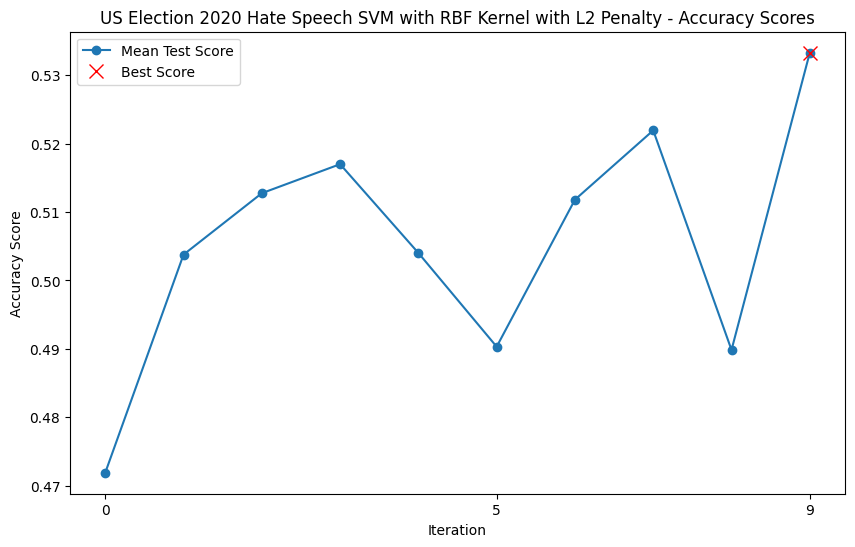

In [111]:
# Plot all accuracy scores for the SVM model with RBF kernel for each iteration
plt.figure(figsize=(10, 6))
plt.plot(us2020hs_svm_rbf_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the best score
best_us2020hs_svm_rbf_score_index = np.argmax(us2020hs_svm_rbf_grid_search.cv_results_['mean_test_score'])
plt.plot(best_us2020hs_svm_rbf_score_index, us2020hs_svm_rbf_grid_search.cv_results_['mean_test_score'][best_us2020hs_svm_rbf_score_index], 'rx', markersize=10, label='Best Score')

plt.title('US Election 2020 Hate Speech SVM with RBF Kernel with L2 Penalty - Accuracy Scores')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')

# Only plot x-axis ticks of 0, the median, and the last iteration
plt.xticks([0, len(us2020hs_svm_rbf_grid_search.cv_results_['mean_test_score']) // 2, len(us2020hs_svm_rbf_grid_search.cv_results_['mean_test_score']) - 1])

plt.legend()
plt.show()

In [112]:
# Train the SVM model with the best parameters
us2020hs_svm_model_rbf = us2020hs_svm_rbf_grid_search.best_estimator_
us2020hs_svm_model_rbf.fit(us2020hs_X_train, us2020hs_y_train)

Pipeline(steps=[('kernel', RBFSampler(gamma=np.float64(1.0), n_components=2)),
                ('clf',
                 SGDClassifier(early_stopping=True, max_iter=13,
                               random_state=42, tol=0.0001))])

In [113]:
# Print the classification report for the us2020hs_svm_model_rbf model
us2020hs_y_pred_rbf = us2020hs_svm_model_rbf.predict(us2020hs_X_test)
print("Classification report for SVM with RBF kernel:")
print(classification_report(us2020hs_y_test, us2020hs_y_pred_rbf))
print(f"F1 Score: {f1_score(us2020hs_y_test, us2020hs_y_pred_rbf, average='weighted'):.4f}")
print(f"Accuracy: {accuracy_score(us2020hs_y_test, us2020hs_y_pred_rbf):.4f}")

Classification report for SVM with RBF kernel:
              precision    recall  f1-score   support

           0       0.49      1.00      0.65       515
           1       0.00      0.00      0.00       545

    accuracy                           0.49      1060
   macro avg       0.24      0.50      0.33      1060
weighted avg       0.24      0.49      0.32      1060

F1 Score: 0.3177
Accuracy: 0.4858


In [114]:
us2020hs_y_test.value_counts()

,count
HOF,
1,545
0,515


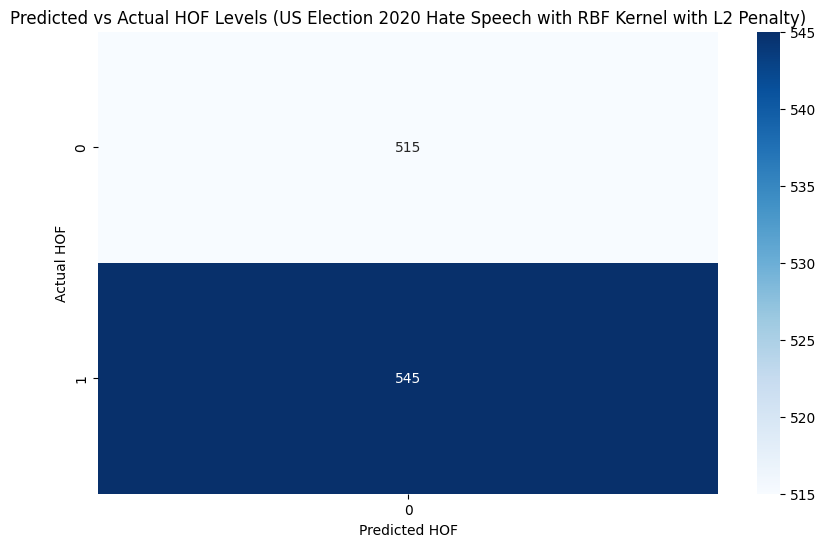

In [115]:
# Plot a heatmap of the predicted vs actual HOF levels
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(us2020hs_y_test, us2020hs_y_pred_rbf), annot=True, fmt='d', cmap='Blues')
plt.title('Predicted vs Actual HOF Levels (US Election 2020 Hate Speech with RBF Kernel with L2 Penalty)')
plt.xlabel('Predicted HOF')
plt.ylabel('Actual HOF')
plt.show()

In [116]:
svm_classification_results_list.append(("US Elections 2020 Election Hate Speech", "RBF", "L2", accuracy_score(us2020hs_y_test, us2020hs_y_pred_rbf), f1_score(us2020hs_y_test, us2020hs_y_pred_rbf, average='weighted')))

In [117]:
us2020hs_custom_param_grid = {
    "C": np.linspace(0.1, 1, 10),
    "kernel": ["linear", "poly", "rbf"],
    "max_iter": [us2020hs_max_iter], # range(160, 200),
    "class_weight": ["balanced", None]
}

In [118]:
# Train and evaluate the SVM model on the US Accidents Upsampled dataset
us2020hs_custom_svm_grid_search, us2020hs_custom_svm_model = svm_grid_search(us2020hs_X_train, us2020hs_X_test, us2020hs_y_train, us2020hs_y_test, us2020hs_custom_param_grid, "us2020hs_custom_svm_model")

Fitting 2 folds for each of 60 candidates, totalling 120 fits
Parameters tested for us2020hs_custom_svm_model:
[{'C': np.float64(0.1),
  'class_weight': 'balanced',
  'kernel': 'linear',
  'max_iter': 13},
 {'C': np.float64(0.1),
  'class_weight': 'balanced',
  'kernel': 'poly',
  'max_iter': 13},
 {'C': np.float64(0.1),
  'class_weight': 'balanced',
  'kernel': 'rbf',
  'max_iter': 13},
 {'C': np.float64(0.1),
  'class_weight': None,
  'kernel': 'linear',
  'max_iter': 13},
 {'C': np.float64(0.1), 'class_weight': None, 'kernel': 'poly', 'max_iter': 13},
 {'C': np.float64(0.1), 'class_weight': None, 'kernel': 'rbf', 'max_iter': 13},
 {'C': np.float64(0.2),
  'class_weight': 'balanced',
  'kernel': 'linear',
  'max_iter': 13},
 {'C': np.float64(0.2),
  'class_weight': 'balanced',
  'kernel': 'poly',
  'max_iter': 13},
 {'C': np.float64(0.2),
  'class_weight': 'balanced',
  'kernel': 'rbf',
  'max_iter': 13},
 {'C': np.float64(0.2),
  'class_weight': None,
  'kernel': 'linear',
  'max_it

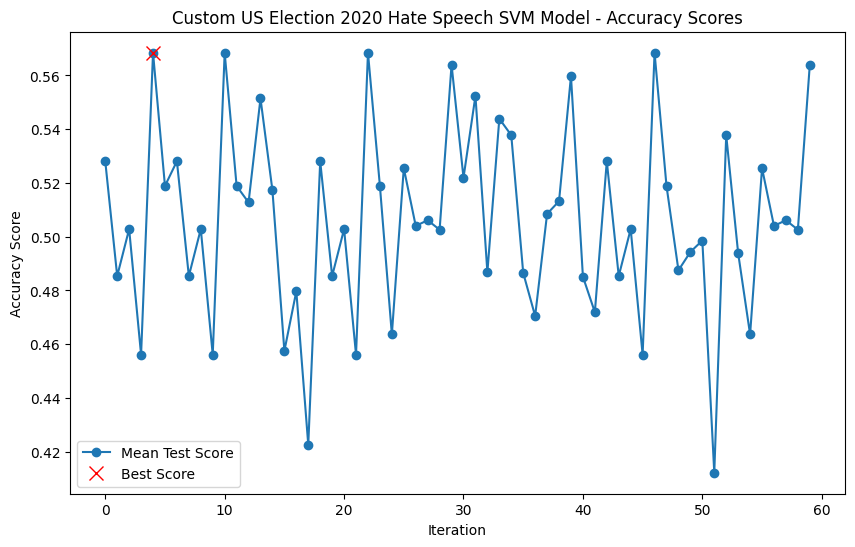

In [119]:
# Plot all accuracy scores for the custom SVM model
plt.figure(figsize=(10, 6))
plt.plot(us2020hs_custom_svm_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the maximum accuracy score
best_us2020hs_custom_svm_score_index = np.argmax(us2020hs_custom_svm_grid_search.cv_results_['mean_test_score'])
plt.plot(best_us2020hs_custom_svm_score_index, us2020hs_custom_svm_grid_search.cv_results_['mean_test_score'][best_us2020hs_custom_svm_score_index], 'rx', markersize=10, label='Best Score')

plt.title('Custom US Election 2020 Hate Speech SVM Model - Accuracy Scores')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [120]:
# Print the best parameters and score from the grid search
print("Best parameters for SVM with linear kernel and L1 penalty:")
pprint(us2020hs_custom_svm_grid_search.best_params_)
print("Best score for SVM with linear kernel and L1 penalty:")
print(us2020hs_custom_svm_grid_search.best_score_)

# Get the best kernel
best_us2020hs_custom_kernel = us2020hs_custom_svm_grid_search.best_params_['kernel']

Best parameters for SVM with linear kernel and L1 penalty:
{'C': np.float64(0.1), 'class_weight': None, 'kernel': 'poly', 'max_iter': 13}
Best score for SVM with linear kernel and L1 penalty:
0.5684608120868744


In [121]:
# Train the SVM model with the best parameters
us2020hs_custom_svm_best_params = us2020hs_custom_svm_grid_search.best_params_.copy()
us2020hs_custom_svm_best_params.pop('kernel', None) # Remove the kernel key if it exists
us2020hs_custom_svm_best_model = us2020hs_custom_svm_grid_search.best_estimator_
us2020hs_custom_svm_best_model.fit(us2020hs_X_train, us2020hs_y_train)

SVC(C=np.float64(0.1), kernel='poly', max_iter=13)

In [122]:
# Use the model to make predictions on the test set
us2020hs_custom_y_pred = us2020hs_custom_svm_best_model.predict(us2020hs_X_test)

# Print the classification report
print("Classification report for US Accidents Upsampled dataset with L1 regularization:")
print(classification_report(us2020hs_y_test, us2020hs_custom_y_pred))

Classification report for US Accidents Upsampled dataset with L1 regularization:
              precision    recall  f1-score   support

           0       0.43      0.72      0.54       515
           1       0.30      0.11      0.16       545

    accuracy                           0.41      1060
   macro avg       0.37      0.42      0.35      1060
weighted avg       0.36      0.41      0.35      1060



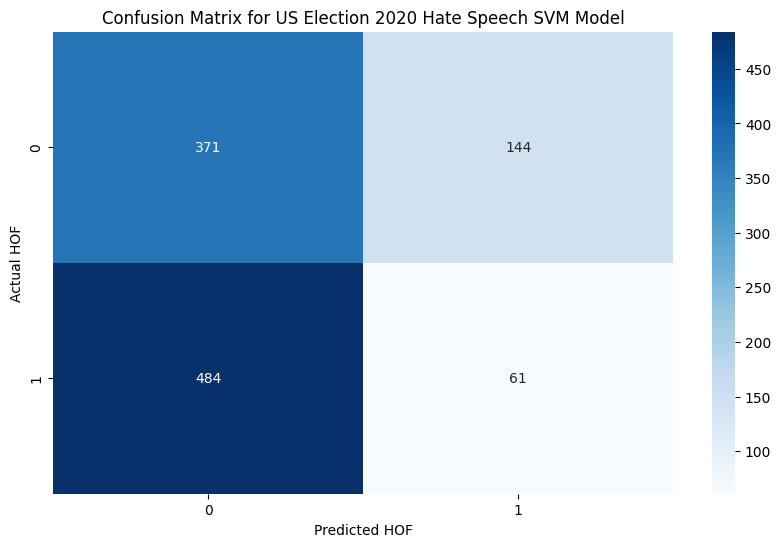

In [123]:
# Plot a heatmap of the predicted vs actual HOF levels
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(us2020hs_y_test, us2020hs_custom_y_pred, rownames=['Actual HOF'], colnames=['Predicted HOF']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for US Election 2020 Hate Speech SVM Model')
plt.show()

In [124]:
# Get the custom model's accuracy and f1-score
us2020hs_custom_accuracy = accuracy_score(us2020hs_y_test, us2020hs_custom_y_pred)
us2020hs_custom_f1_score = f1_score(us2020hs_y_test, us2020hs_custom_y_pred, average='weighted')
print(f"Custom SVM Model Accuracy: {us2020hs_custom_accuracy}")
print(f"Custom SVM Model F1-Score: {us2020hs_custom_f1_score}")

Custom SVM Model Accuracy: 0.4075471698113208
Custom SVM Model F1-Score: 0.346773906257173


In [125]:
svm_classification_results_list.append(("US Elections 2020 Election Hate Speech", best_us2020hs_custom_kernel, "L1", us2020hs_custom_accuracy, us2020hs_custom_f1_score))

In [126]:
svm_classification_results_list

[('Convabuse', 'Linear', 'L1', 0.33234008740564164, 0.2378010774143733),
 ('Convabuse', 'RBF', 'L2', 0.3428684942391736, 0.2468735054913945),
 ('Convabuse', 'linear', 'L1', 0.19576877234803336, 0.06410171115507496),
 ('Dynamically Generated Hate Speech',
  'Linear',
  'L1',
  0.834870848708487,
  0.8302887273632195),
 ('Dynamically Generated Hate Speech',
  'RBF',
  'L2',
  0.834870848708487,
  0.8302887273632195),
 ('Dynamically Generated Hate Speech',
  'poly',
  'L1',
  0.5911966262519768,
  0.5749792931283668),
 ('US Elections 2020 Election Hate Speech',
  'Linear',
  'L1',
  0.5716981132075472,
  0.570939241682504),
 ('US Elections 2020 Election Hate Speech',
  'RBF',
  'L2',
  0.4858490566037736,
  0.3177298592392932),
 ('US Elections 2020 Election Hate Speech',
  'poly',
  'L1',
  0.4075471698113208,
  0.346773906257173)]

## MLMA Hate Speech Support Vector Machines

In [127]:
# Use grid search to find the best hyperparameters for the Linear SVC model
mlma_hate_speech_svm_linear_param_grid = {
    'C': np.linspace(0.1, 1, 10), # Regularization parameter
    'loss': ['squared_hinge'], # Loss function
    'max_iter': [mlma_hate_speech_max_iter], # range(2, 10), # Maximum number of iterations
    'tol': [1e-4] # Tolerance for stopping criteria
}

In [128]:
# Get a 30% sample of mlma_hate_speech
mlma_hate_speech_sample = mlma_hate_speech.sample(frac=0.3, random_state=42)

# X and y
mlma_hate_speech_X_sample = mlma_hate_speech_sample.drop('abuse_level', axis=1)
mlma_hate_speech_y_sample = mlma_hate_speech_sample['abuse_level']

# Standard scale
mlma_hate_speech_X_sample_scaled = StandardScaler().fit_transform(mlma_hate_speech_X_sample)
mlma_hate_speech_X_sample_scaled = pd.DataFrame(mlma_hate_speech_X_sample_scaled, columns=mlma_hate_speech_X_sample.columns)

# Train test split
mlma_hate_speech_X_train_sample, mlma_hate_speech_X_test_sample, mlma_hate_speech_y_train_sample, mlma_hate_speech_y_test_sample = train_test_split(mlma_hate_speech_X_sample_scaled, mlma_hate_speech_y_sample, test_size=0.2, random_state=42)

In [129]:
mlma_hate_speech_svm_linear_grid_search = GridSearchCV(svm.LinearSVC(), mlma_hate_speech_svm_linear_param_grid, cv=5, scoring='accuracy')
mlma_hate_speech_svm_linear_grid_search.fit(mlma_hate_speech_X_train_sample, mlma_hate_speech_y_train_sample)

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'loss': ['squared_hinge'], 'max_iter': [16],
                         'tol': [0.0001]},
             scoring='accuracy')

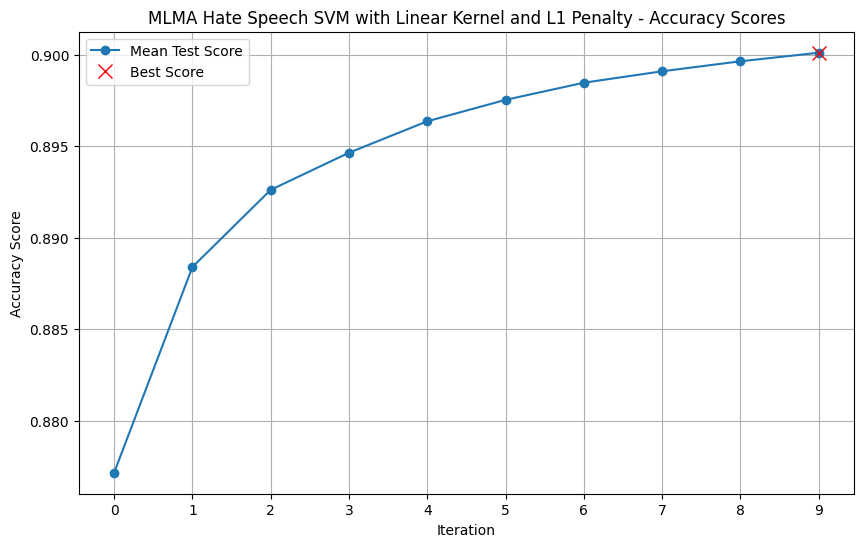

In [130]:
# Plot all accuracy scores for the SVM model with linear kernel and L1 penalty for each iteration
plt.figure(figsize=(10, 6))
plt.plot(mlma_hate_speech_svm_linear_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the best score
mlma_hate_speech_linear_best_score_index = np.argmax(mlma_hate_speech_svm_linear_grid_search.cv_results_['mean_test_score'])
plt.plot(mlma_hate_speech_linear_best_score_index, mlma_hate_speech_svm_linear_grid_search.cv_results_['mean_test_score'][mlma_hate_speech_linear_best_score_index], 'rx', markersize=10, label='Best Score')

plt.title('MLMA Hate Speech SVM with Linear Kernel and L1 Penalty - Accuracy Scores')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')
plt.xticks(range(len(mlma_hate_speech_svm_linear_grid_search.cv_results_['mean_test_score'])))
plt.grid()
plt.legend()
plt.show()

In [131]:
# Print the best parameters and score from the grid search
print("Best parameters for SVM with linear kernel and L1 penalty:")
pprint(mlma_hate_speech_svm_linear_grid_search.best_params_)
print("Best score for SVM with linear kernel and L1 penalty:")
print(mlma_hate_speech_svm_linear_grid_search.best_score_)

Best parameters for SVM with linear kernel and L1 penalty:
{'C': np.float64(1.0), 'loss': 'squared_hinge', 'max_iter': 16, 'tol': 0.0001}
Best score for SVM with linear kernel and L1 penalty:
0.9001171417415073


In [132]:
# Train the SVM model with the best parameters
mlma_hate_speech_svm_model_linear = svm.LinearSVC(**mlma_hate_speech_svm_linear_grid_search.best_params_, random_state=42)
mlma_hate_speech_svm_model_linear.fit(mlma_hate_speech_X_train_sample, mlma_hate_speech_y_train_sample)

LinearSVC(C=np.float64(1.0), max_iter=16, random_state=42)

In [133]:
# Print the classification report for the mlma_hate_speech_svm_model_linear model
mlma_hate_speech_y_pred_linear = mlma_hate_speech_svm_model_linear.predict(mlma_hate_speech_X_test)
print("Classification report for SVM with linear kernel and L1 penalty:")
print(classification_report(mlma_hate_speech_y_test, mlma_hate_speech_y_pred_linear))
print(f"F1 Score: {f1_score(mlma_hate_speech_y_test, mlma_hate_speech_y_pred_linear, average='weighted'):.4f}")
print(f"Accuracy: {accuracy_score(mlma_hate_speech_y_test, mlma_hate_speech_y_pred_linear):.4f}")

Classification report for SVM with linear kernel and L1 penalty:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2690
           2       0.85      0.78      0.81      2607
           3       0.81      0.83      0.82      2680
           4       0.98      1.00      0.99      2695

    accuracy                           0.90     10672
   macro avg       0.90      0.90      0.90     10672
weighted avg       0.90      0.90      0.90     10672

F1 Score: 0.9034
Accuracy: 0.9045


In [134]:
len(mlma_hate_speech_X_train), len(mlma_hate_speech_y_train), len(mlma_hate_speech_y_pred_linear)

(42684, 42684, 10672)

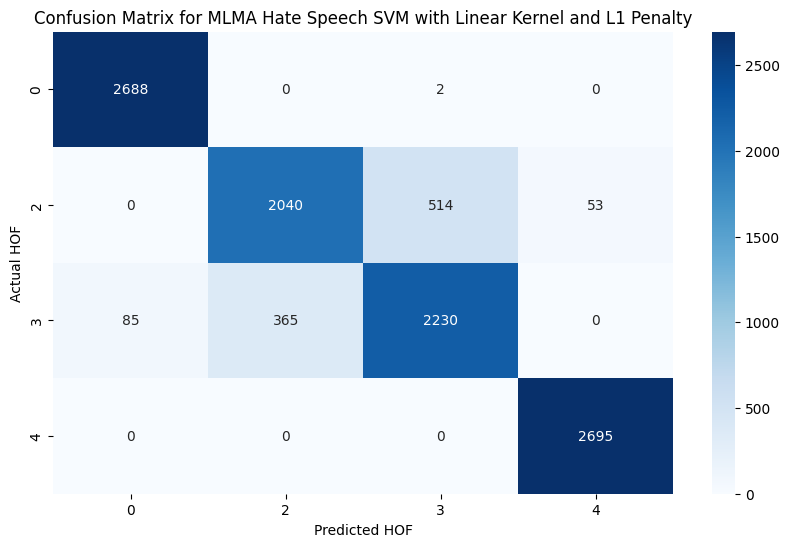

In [135]:
# Plot a heatmap of the actual vs predicted HOF for the mlma_hate_speech_svm_model_linear model
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(mlma_hate_speech_y_test, mlma_hate_speech_y_pred_linear, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for MLMA Hate Speech SVM with Linear Kernel and L1 Penalty')
plt.xlabel('Predicted HOF')
plt.ylabel('Actual HOF')
plt.show()

In [136]:
svm_classification_results_list.append(("MLMA Hate Speech", "Linear", "L1", accuracy_score(mlma_hate_speech_y_test, mlma_hate_speech_y_pred_linear), f1_score(mlma_hate_speech_y_test, mlma_hate_speech_y_pred_linear, average='weighted')))

In [137]:
mlma_hate_speech_svm_rbf_pipeline = Pipeline([
    ("kernel", RBFSampler()),
    ("clf", SGDClassifier(loss="hinge", random_state=42, penalty="l2", tol=1e-4))
])

In [138]:
# Use grid search to find the best hyperparameters for the SVM model
mlma_hate_speech_svm_rbf_param_grid = {
    'kernel__gamma': np.linspace(0.1, 1, 10), # Kernel coefficient,
    'kernel__n_components': [9],  # range(7, mlma_hate_speech_X_train.shape[1] + 1), # Number of components for the RBF kernel
    'clf__alpha': [1e-4], # Regularization parameter
    'clf__max_iter': [mlma_hate_speech_max_iter], # range(470, 495, 5), # Maximum number of iterations
    'clf__tol': [1e-4], # Tolerance for stopping criteria
    'clf__early_stopping': [True] # Whether to use early stopping
}

In [139]:
# Perform a grid search using the RBFSampler
mlma_hate_speech_svm_rbf_grid_search = GridSearchCV(
    estimator=mlma_hate_speech_svm_rbf_pipeline,
    param_grid=
    mlma_hate_speech_svm_rbf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=2,
    verbose=True
)

In [140]:
# Fit the grid search to the training data
mlma_hate_speech_svm_rbf_grid_search.fit(mlma_hate_speech_X_train, mlma_hate_speech_y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('kernel', RBFSampler()),
                                       ('clf',
                                        SGDClassifier(random_state=42,
                                                      tol=0.0001))]),
             n_jobs=2,
             param_grid={'clf__alpha': [0.0001], 'clf__early_stopping': [True],
                         'clf__max_iter': [16], 'clf__tol': [0.0001],
                         'kernel__gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'kernel__n_components': [9]},
             scoring='accuracy', verbose=True)

In [141]:
# Print the best parameters and score from the grid search
print("Best parameters for SVM with RBF kernel:")
pprint(mlma_hate_speech_svm_rbf_grid_search.best_params_)
print("Best score for SVM with RBF kernel:")
print(mlma_hate_speech_svm_rbf_grid_search.best_score_)

Best parameters for SVM with RBF kernel:
{'clf__alpha': 0.0001,
 'clf__early_stopping': True,
 'clf__max_iter': 16,
 'clf__tol': 0.0001,
 'kernel__gamma': np.float64(0.1),
 'kernel__n_components': 9}
Best score for SVM with RBF kernel:
0.3531989205376365


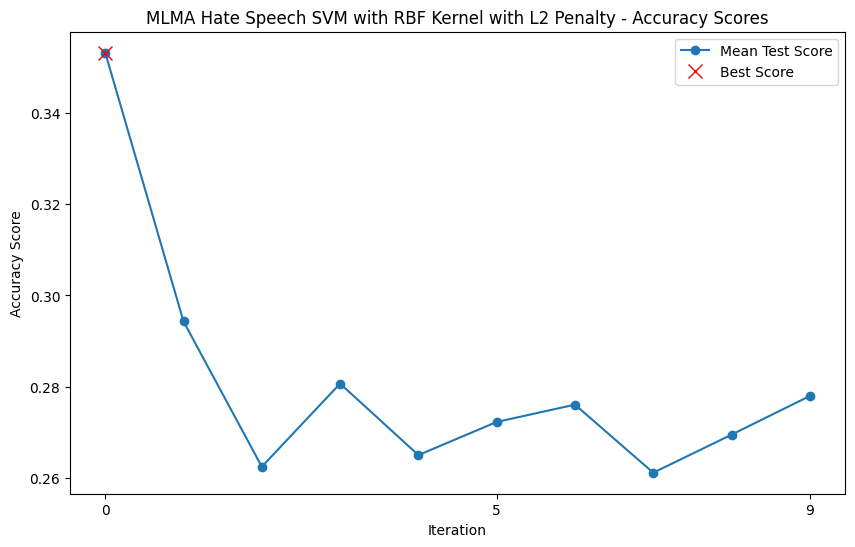

In [142]:
# Plot all accuracy scores for the SVM model with RBF kernel for each iteration
plt.figure(figsize=(10, 6))
plt.plot(mlma_hate_speech_svm_rbf_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the best score
best_mlma_hate_speech_svm_rbf_score_index = np.argmax(mlma_hate_speech_svm_rbf_grid_search.cv_results_['mean_test_score'])
plt.plot(best_mlma_hate_speech_svm_rbf_score_index, mlma_hate_speech_svm_rbf_grid_search.cv_results_['mean_test_score'][best_mlma_hate_speech_svm_rbf_score_index], 'rx', markersize=10, label='Best Score')

plt.title('MLMA Hate Speech SVM with RBF Kernel with L2 Penalty - Accuracy Scores')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')

# Only plot x-axis ticks of 0, the median, and the last iteration
plt.xticks([0, len(mlma_hate_speech_svm_rbf_grid_search.cv_results_['mean_test_score']) // 2, len(mlma_hate_speech_svm_rbf_grid_search.cv_results_['mean_test_score']) - 1])

plt.legend()
plt.show()

In [143]:
# Train the SVM model with the best parameters
mlma_hate_speech_svm_model_rbf = mlma_hate_speech_svm_rbf_grid_search.best_estimator_
mlma_hate_speech_svm_model_rbf.fit(mlma_hate_speech_X_train, mlma_hate_speech_y_train)

Pipeline(steps=[('kernel', RBFSampler(gamma=np.float64(0.1), n_components=9)),
                ('clf',
                 SGDClassifier(early_stopping=True, max_iter=16,
                               random_state=42, tol=0.0001))])

In [144]:
# Print the classification report for the mlma_hate_speech_svm_model_rbf model
mlma_hate_speech_y_pred_rbf = mlma_hate_speech_svm_model_rbf.predict(mlma_hate_speech_X_test)
print("Classification report for SVM with RBF kernel:")
print(classification_report(mlma_hate_speech_y_test, mlma_hate_speech_y_pred_rbf))
print(f"F1 Score: {f1_score(mlma_hate_speech_y_test, mlma_hate_speech_y_pred_rbf, average='weighted'):.4f}")
print(f"Accuracy: {accuracy_score(mlma_hate_speech_y_test, mlma_hate_speech_y_pred_rbf):.4f}")

Classification report for SVM with RBF kernel:
              precision    recall  f1-score   support

           0       0.71      0.03      0.06      2690
           2       0.00      0.00      0.00      2607
           3       0.25      1.00      0.40      2680
           4       0.00      0.00      0.00      2695

    accuracy                           0.26     10672
   macro avg       0.24      0.26      0.12     10672
weighted avg       0.24      0.26      0.12     10672

F1 Score: 0.1177
Accuracy: 0.2586


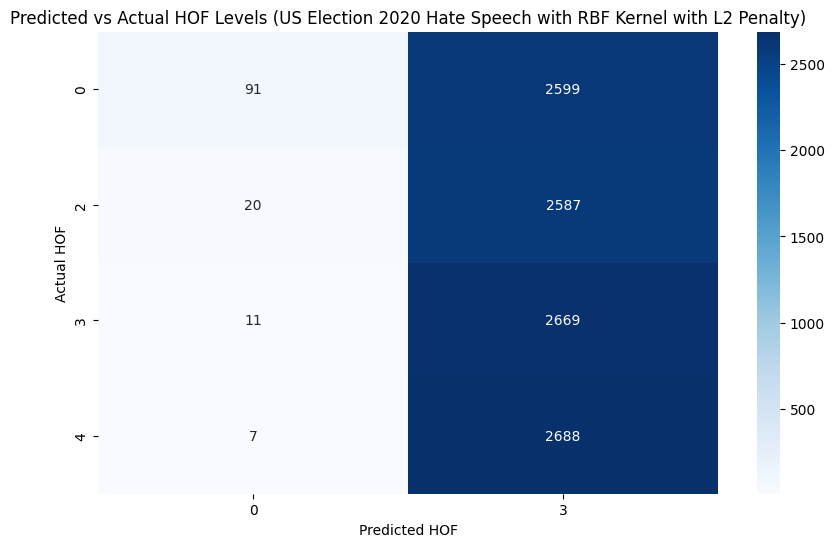

In [145]:
# Plot a heatmap of the predicted vs actual HOF levels
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(mlma_hate_speech_y_test, mlma_hate_speech_y_pred_rbf), annot=True, fmt='d', cmap='Blues')
plt.title('Predicted vs Actual HOF Levels (US Election 2020 Hate Speech with RBF Kernel with L2 Penalty)')
plt.xlabel('Predicted HOF')
plt.ylabel('Actual HOF')
plt.show()

In [146]:
svm_classification_results_list.append(("MLMA Hate Speech", "RBF", "L2", accuracy_score(mlma_hate_speech_y_test, mlma_hate_speech_y_pred_rbf), f1_score(mlma_hate_speech_y_test, mlma_hate_speech_y_pred_rbf, average='weighted')))

In [147]:
mlma_hate_speech_custom_param_grid = {
    "C": np.linspace(0.1, 1, 10),
    "kernel": ["linear"],
    "max_iter": [mlma_hate_speech_max_iter], # [100, 200, 300], #range(100, 1000, 100),
    "class_weight": [None]
}

In [148]:
# Train and evaluate the SVM model on the US Accidents Upsampled dataset
mlma_hate_speech_custom_svm_grid_search, mlma_hate_speech_custom_svm_model = svm_grid_search(mlma_hate_speech_X_train, mlma_hate_speech_X_test, mlma_hate_speech_y_train, mlma_hate_speech_y_test, mlma_hate_speech_custom_param_grid, "mlma_hate_speech_custom_svm_model")

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Parameters tested for mlma_hate_speech_custom_svm_model:
[{'C': np.float64(0.1),
  'class_weight': None,
  'kernel': 'linear',
  'max_iter': 16},
 {'C': np.float64(0.2),
  'class_weight': None,
  'kernel': 'linear',
  'max_iter': 16},
 {'C': np.float64(0.30000000000000004),
  'class_weight': None,
  'kernel': 'linear',
  'max_iter': 16},
 {'C': np.float64(0.4),
  'class_weight': None,
  'kernel': 'linear',
  'max_iter': 16},
 {'C': np.float64(0.5),
  'class_weight': None,
  'kernel': 'linear',
  'max_iter': 16},
 {'C': np.float64(0.6),
  'class_weight': None,
  'kernel': 'linear',
  'max_iter': 16},
 {'C': np.float64(0.7000000000000001),
  'class_weight': None,
  'kernel': 'linear',
  'max_iter': 16},
 {'C': np.float64(0.8),
  'class_weight': None,
  'kernel': 'linear',
  'max_iter': 16},
 {'C': np.float64(0.9),
  'class_weight': None,
  'kernel': 'linear',
  'max_iter': 16},
 {'C': np.float64(1.0),
  'class_weight': None,
  

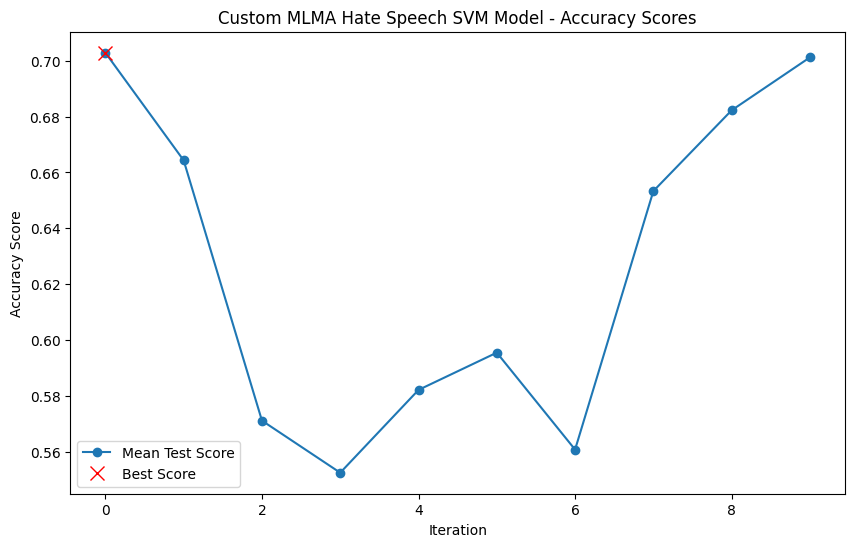

In [149]:
# Plot all accuracy scores for the custom SVM model
plt.figure(figsize=(10, 6))
plt.plot(mlma_hate_speech_custom_svm_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the maximum accuracy score
best_mlma_hate_speech_custom_svm_score_index = np.argmax(mlma_hate_speech_custom_svm_grid_search.cv_results_['mean_test_score'])
plt.plot(best_mlma_hate_speech_custom_svm_score_index, mlma_hate_speech_custom_svm_grid_search.cv_results_['mean_test_score'][best_mlma_hate_speech_custom_svm_score_index], 'rx', markersize=10, label='Best Score')

plt.title('Custom MLMA Hate Speech SVM Model - Accuracy Scores')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [150]:
# Print the best parameters and score from the grid search
print("Best parameters for SVM with linear kernel and L1 penalty:")
pprint(mlma_hate_speech_custom_svm_grid_search.best_params_)
print("Best score for SVM with linear kernel and L1 penalty:")
print(mlma_hate_speech_custom_svm_grid_search.best_score_)

# Best custom kernel
best_mlma_hate_speech_custom_kernel = mlma_hate_speech_custom_svm_grid_search.best_params_['kernel']

Best parameters for SVM with linear kernel and L1 penalty:
{'C': np.float64(0.1), 'class_weight': None, 'kernel': 'linear', 'max_iter': 16}
Best score for SVM with linear kernel and L1 penalty:
0.7028160434823353


In [151]:
# Train the SVM model with the best parameters
mlma_hate_speech_custom_svm_best_params = mlma_hate_speech_custom_svm_grid_search.best_params_.copy()
mlma_hate_speech_custom_svm_best_params.pop('kernel', None) # Remove the kernel key if it exists
mlma_hate_speech_custom_svm_best_model = svm.LinearSVC(**mlma_hate_speech_custom_svm_best_params, random_state=42)
mlma_hate_speech_custom_svm_best_model.fit(mlma_hate_speech_X_train, mlma_hate_speech_y_train)

LinearSVC(C=np.float64(0.1), max_iter=16, random_state=42)

In [152]:
# Use the model to make predictions on the test set
mlma_hate_speech_custom_y_pred = mlma_hate_speech_custom_svm_best_model.predict(mlma_hate_speech_X_test)

# Print the classification report
print("Classification report for MLMA Hate Speech Dataset with L1 regularization:")
print(classification_report(mlma_hate_speech_y_test, mlma_hate_speech_custom_y_pred))

Classification report for MLMA Hate Speech Dataset with L1 regularization:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2690
           2       0.84      0.79      0.81      2607
           3       0.83      0.81      0.82      2680
           4       0.96      1.00      0.98      2695

    accuracy                           0.90     10672
   macro avg       0.90      0.90      0.90     10672
weighted avg       0.90      0.90      0.90     10672



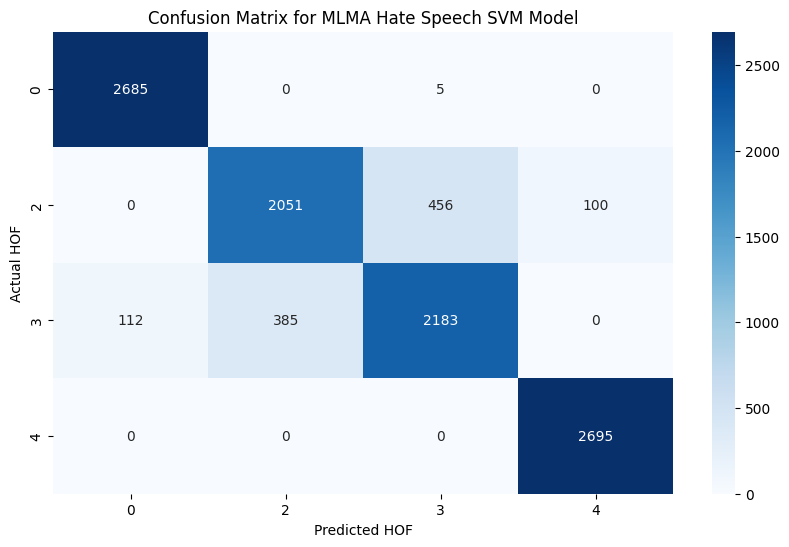

In [153]:
# Plot a heatmap of the predicted vs actual HOF levels
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(mlma_hate_speech_y_test, mlma_hate_speech_custom_y_pred, rownames=['Actual HOF'], colnames=['Predicted HOF']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for MLMA Hate Speech SVM Model')
plt.show()

In [154]:
# Get the custom model's accuracy and f1-score
mlma_hate_speech_custom_accuracy = accuracy_score(mlma_hate_speech_y_test, mlma_hate_speech_custom_y_pred)
mlma_hate_speech_custom_f1_score = f1_score(mlma_hate_speech_y_test, mlma_hate_speech_custom_y_pred, average='weighted')
print(f"Custom SVM Model Accuracy: {mlma_hate_speech_custom_accuracy}")
print(f"Custom SVM Model F1-Score: {mlma_hate_speech_custom_f1_score}")

Custom SVM Model Accuracy: 0.9008620689655172
Custom SVM Model F1-Score: 0.8992558770175214


In [155]:
svm_classification_results_list.append(("MLMA Hate Speech", best_mlma_hate_speech_custom_kernel, "L1", mlma_hate_speech_custom_accuracy, mlma_hate_speech_custom_f1_score))

In [156]:
svm_classification_results_list

[('Convabuse', 'Linear', 'L1', 0.33234008740564164, 0.2378010774143733),
 ('Convabuse', 'RBF', 'L2', 0.3428684942391736, 0.2468735054913945),
 ('Convabuse', 'linear', 'L1', 0.19576877234803336, 0.06410171115507496),
 ('Dynamically Generated Hate Speech',
  'Linear',
  'L1',
  0.834870848708487,
  0.8302887273632195),
 ('Dynamically Generated Hate Speech',
  'RBF',
  'L2',
  0.834870848708487,
  0.8302887273632195),
 ('Dynamically Generated Hate Speech',
  'poly',
  'L1',
  0.5911966262519768,
  0.5749792931283668),
 ('US Elections 2020 Election Hate Speech',
  'Linear',
  'L1',
  0.5716981132075472,
  0.570939241682504),
 ('US Elections 2020 Election Hate Speech',
  'RBF',
  'L2',
  0.4858490566037736,
  0.3177298592392932),
 ('US Elections 2020 Election Hate Speech',
  'poly',
  'L1',
  0.4075471698113208,
  0.346773906257173),
 ('MLMA Hate Speech', 'Linear', 'L1', 0.904516491754123, 0.9033932402272173),
 ('MLMA Hate Speech', 'RBF', 'L2', 0.25862068965517243, 0.1176501274184442),
 ('M

## Support Vector Machine Conclusions

In [157]:
# Convert the svm_results_list to a DataFrame
svm_classification_summary = pd.DataFrame(svm_classification_results_list, columns=["Dataset", "Kernel", "Regularization", "Accuracy", "F1 Score"])
svm_classification_summary

,Dataset,Kernel,Regularization,Accuracy,F1 Score
0,Convabuse,Linear,L1,0.332340,0.237801
1,Convabuse,RBF,L2,0.342868,0.246874
2,Convabuse,linear,L1,0.195769,0.064102
3,Dynamically Generated Hate Speech,Linear,L1,0.834871,0.830289
4,Dynamically Generated Hate Speech,RBF,L2,0.834871,0.830289
5,Dynamically Generated Hate Speech,poly,L1,0.591197,0.574979
6,US Elections 2020 Election Hate Speech,Linear,L1,0.571698,0.570939
7,US Elections 2020 Election Hate Speech,RBF,L2,0.485849,0.317730
8,US Elections 2020 Election Hate Speech,poly,L1,0.407547,0.346774
9,MLMA Hate Speech,Linear,L1,0.904516,0.903393


In [158]:
svm_regression_summary = pd.DataFrame(svm_regression_results_list, columns=["Dataset", "Kernel", "Regularization", "RMSE", "R2"])
svm_regression_summary

,Dataset,Kernel,Regularization,RMSE,R2
0,Online Abusive Attacks,Linear,L1,5.389868,0.877862
1,Online Abusive Attacks,rbf,L1,17.499677,-0.287517


In [159]:
svm_classification_summary.to_csv("/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/results/model5_svm-classification-summary.csv", index=False)
svm_regression_summary.to_csv("/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/results/model5_svm-regression-summary.csv", index=False)